In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving walmart_data.csv to walmart_data.csv


In [ ]:
'''
Problem Statement:
We have been provide with case study of Retail Purchase Behavior Analysis of sales, we will explore the load the data set and we will
start to explore each category one by one. Our primary aim is to see how the purchases have been done by
Male and female, how the purchases trends are in each category and on Martial Status.
We will also determine the confirdence Inverval of 90%,95%, 99% on the above categories mentioned
'''

    I

In [ ]:
w = pd.read_csv('data.csv')

In [ ]:
# @title Default title text
w = pd.read_csv('walmart_data.csv')

In [ ]:
w.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [ ]:
w.isnull()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
550063,False,False,False,False,False,False,False,False,False,False
550064,False,False,False,False,False,False,False,False,False,False
550065,False,False,False,False,False,False,False,False,False,False
550066,False,False,False,False,False,False,False,False,False,False


In [ ]:
w.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [ ]:
# We could see there are 5 categorical and 5 Numerical columns
# We however need to change the 1,0 of the Marital_Status to Married and Unmarried. We will later do it below anyways

In [ ]:
w['Marital_Status'] = w['Marital_Status'].map({1: 'Married', 0: 'UnMarried'})

In [ ]:
w.shape

(550068, 10)

In [ ]:
w.ndim

2

In [ ]:
nullcount = w.isnull().sum()
nullcount

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [ ]:
### we could observe that there are not null values

In [ ]:
w.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [ ]:
w['Gender'].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

In [ ]:
# From the above we could see that there are 414259 orders a Male has purchased.
# 135809 orders Females have purchased. We have 3x times of Males purchases than female.
#We can safely say that majority of the purchaser are Male.

In [ ]:
total_users_genderwise = w.groupby('Gender')['User_ID'].nunique()
total_users_genderwise

Gender
F    1666
M    4225
Name: User_ID, dtype: int64

In [ ]:
# from the above we could see that we have 4225 Male user Id and 1666 female user Id.

In [ ]:
w['User_ID'].value_counts()

1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
           ... 
1002690       7
1002111       7
1005810       7
1004991       7
1000708       6
Name: User_ID, Length: 5891, dtype: int64

In [ ]:
w['User_ID'].nunique()

5891

In [ ]:
w['Product_ID'].value_counts()


P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00314842       1
P00298842       1
P00231642       1
P00204442       1
P00066342       1
Name: Product_ID, Length: 3631, dtype: int64

In [ ]:
# we could see that 3631 are total types of product that has been sold from the Walmart

<Axes: xlabel='Product_ID', ylabel='count'>

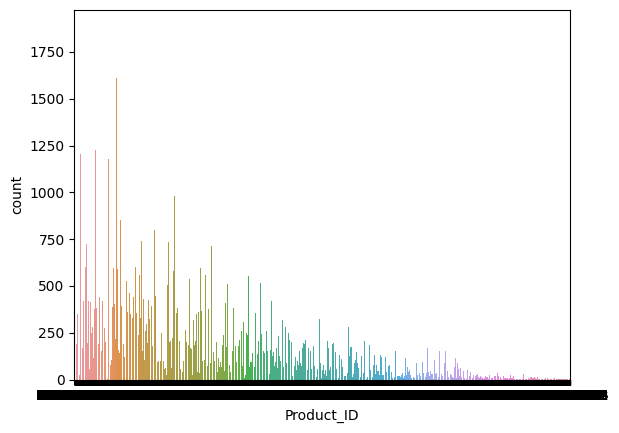

In [ ]:
sns.countplot(data = w, x='Product_ID')

In [ ]:
w['Product_ID'].nunique()

3631

In [ ]:
w[(w['Purchase'] >= 100) & (w['Purchase'] < 1000)]['Product_ID'].value_counts()

P00371644    899
P00372445    837
P00375436    814
P00084442    564
P00173042    537
            ... 
P00220942      1
P00174942      1
P00023542      1
P00145342      1
P00309042      1
Name: Product_ID, Length: 168, dtype: int64

In [ ]:
duplicate_rows = w.duplicated()
# To display the duplicate rows
duplicate_data = w[duplicate_rows]

duplicate_data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase


In [ ]:
# we could see that there are no duplicate rows

In [ ]:
w['Age'].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

In [ ]:
#We could see from the above between Age category 26 - 35 the highest number of purchases 219587 have been made
# Followed by 110013 purchases from the age category 36 - 45 and 99660 in the age category 18 to 25

In [ ]:
# Group by 'Age' and sum the 'Purchase' amounts
total_purchases_by_age = w.groupby('Age')['Purchase'].sum()

# Display the result
print(total_purchases_by_age)


Age
0-17      134913183
18-25     913848675
26-35    2031770578
36-45    1026569884
46-50     420843403
51-55     367099644
55+       200767375
Name: Purchase, dtype: int64


In [ ]:
# we could see the highest sum of puchases falls between the age category 26 to 35 followed by age categories 36-45 and 18 - 25.


In [ ]:
total_purchases_by_age_avg = w.groupby('Age')['Purchase'].mean()
total_purchases_by_age_avg

Age
0-17     8933.464640
18-25    9169.663606
26-35    9252.690633
36-45    9331.350695
46-50    9208.625697
51-55    9534.808031
55+      9336.280459
Name: Purchase, dtype: float64

In [ ]:
# we could see the average purchase of products is above 9200 for between the age categories of 26-35,36-45 ,46-50,51-55,55+

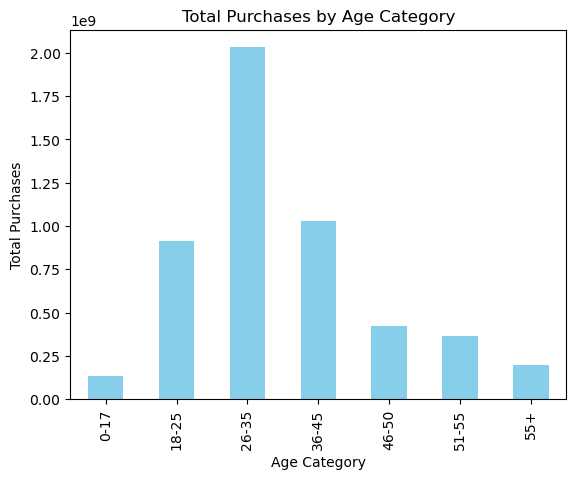

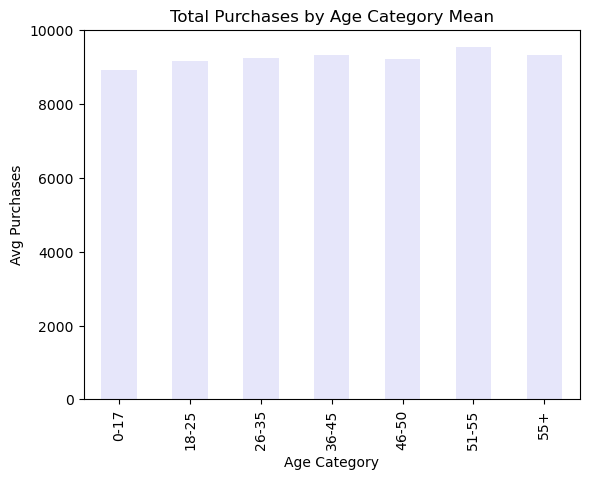

In [ ]:
# Group by 'Age' and sum the 'Purchase' amounts
total_purchases_by_age = w.groupby('Age')['Purchase'].sum()
total_purchases_by_age_avg = w.groupby('Age')['Purchase'].mean()
# Plotting
total_purchases_by_age.plot(kind='bar', color='skyblue')
plt.title('Total Purchases by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Total Purchases')
plt.show()

total_purchases_by_age_avg.plot(kind='bar', color='Lavender')
plt.title('Total Purchases by Age Category Mean')
plt.xlabel('Age Category')
plt.ylabel('Avg Purchases')
plt.show()

In [ ]:
total_purchases_count_by_age = w.groupby('Age')['Product_ID'].nunique()
total_purchases_count_by_age

Age
0-17     2323
18-25    3220
26-35    3427
36-45    3328
46-50    3106
51-55    2887
55+      2584
Name: Product_ID, dtype: int64

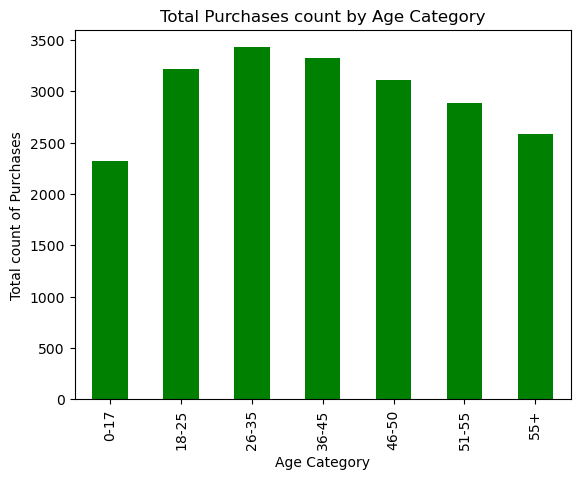

In [ ]:
total_purchases_count_by_age.plot(kind='bar', color='green')
plt.title('Total Purchases count by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Total count of Purchases')
plt.show()

In [ ]:
total_user_count_by_age = w.groupby('Age')['User_ID'].nunique()
total_user_count_by_age

Age
0-17      218
18-25    1069
26-35    2053
36-45    1167
46-50     531
51-55     481
55+       372
Name: User_ID, dtype: int64

In [ ]:
total_user_count_by_age.sum()

5891

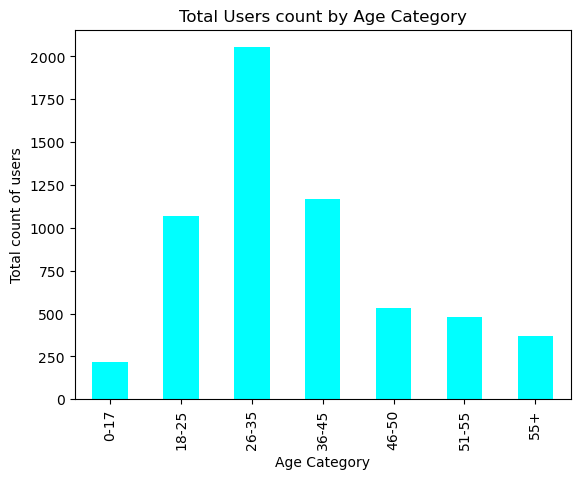

In [ ]:
total_user_count_by_age.plot(kind='bar', color='cyan')
plt.title('Total Users count by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Total count of users')
plt.show()

In [ ]:
total_user_MarriedorUnmarried_by_age = w.groupby('Age')['Marital_Status'].value_counts()
total_user_MarriedorUnmarried_by_age

Age    Marital_Status
0-17   UnMarried          15102
18-25  UnMarried          78544
       Married            21116
26-35  UnMarried         133296
       Married            86291
36-45  UnMarried          66377
       Married            43636
46-50  Married            33011
       UnMarried          12690
51-55  Married            27662
       UnMarried          10839
55+    Married            13621
       UnMarried           7883
Name: Marital_Status, dtype: int64

In [ ]:
# the above is the distribution of purchase of the age category with repsect to Married and Unnmarried.

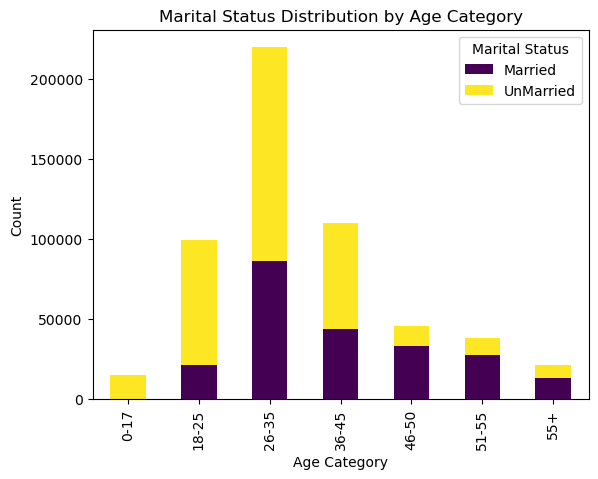

In [ ]:
data = {
    'Age': ['0-17', '18-25', '18-25', '26-35', '26-35', '36-45', '36-45', '46-50', '46-50', '51-55', '51-55', '55+', '55+'],
    'Marital_Status': ['UnMarried', 'UnMarried', 'Married', 'UnMarried', 'Married', 'UnMarried', 'Married', 'Married', 'UnMarried', 'Married', 'UnMarried', 'Married', 'UnMarried'],
    'Count': [15102, 78544, 21116, 133296, 86291, 66377, 43636, 33011, 12690, 27662, 10839, 13621, 7883]
}

df = pd.DataFrame(data)

# Pivot the DataFrame for better plotting
pivot_df = df.pivot(index='Age', columns='Marital_Status', values='Count')

# Plotting
ax = pivot_df.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Marital Status Distribution by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.legend(title='Marital Status', loc='upper right')
plt.show()


In [ ]:
total_user_MarriedorUnmarried_by_age_unique = w.groupby(['Age','Marital_Status'])['User_ID'].nunique()
total_user_MarriedorUnmarried_by_age_unique

Age    Marital_Status
0-17   UnMarried          218
18-25  Married            244
       UnMarried          825
26-35  Married            809
       UnMarried         1244
36-45  Married            462
       UnMarried          705
46-50  Married            375
       UnMarried          156
51-55  Married            345
       UnMarried          136
55+    Married            239
       UnMarried          133
Name: User_ID, dtype: int64

In [ ]:
# We can see the number of users in each age category
#

In [ ]:
Married_by_age = w.groupby(['Age', 'Gender', 'Marital_Status'])['User_ID'].nunique()
Married_by_age

Age    Gender  Marital_Status
0-17   F       UnMarried          78
       M       UnMarried         140
18-25  F       Married            70
               UnMarried         217
       M       Married           174
               UnMarried         608
26-35  F       Married           225
               UnMarried         320
       M       Married           584
               UnMarried         924
36-45  F       Married           131
               UnMarried         202
       M       Married           331
               UnMarried         503
46-50  F       Married           133
               UnMarried          49
       M       Married           242
               UnMarried         107
51-55  F       Married            93
               UnMarried          49
       M       Married           252
               UnMarried          87
55+    F       Married            67
               UnMarried          32
       M       Married           172
               UnMarried         101
Name: Us

In [ ]:
# this is also the distribution of age category, how many Male and female present in each category, whether they are unmarried
# Or Married and the count of user ID in each catgory.

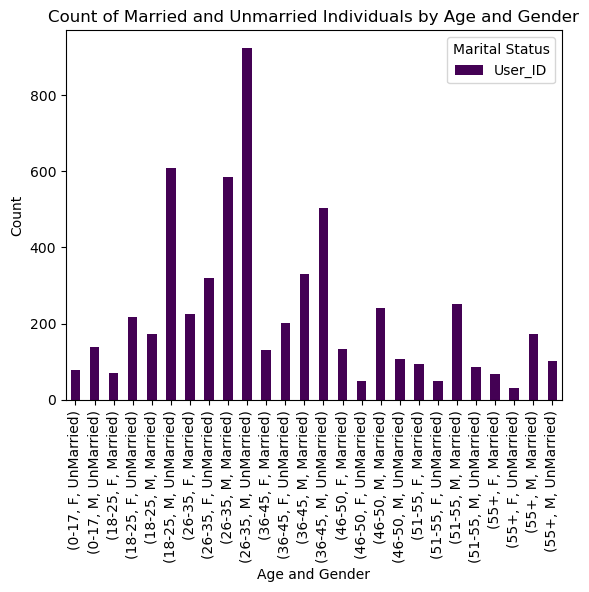

In [ ]:
Married_by_age = w.groupby(['Age', 'Gender', 'Marital_Status'])['User_ID'].nunique()

# Plotting
ax = Married_by_age.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Count of Married and Unmarried Individuals by Age and Gender')
plt.xlabel('Age and Gender')
plt.ylabel('Count')
plt.legend(title='Marital Status', loc='upper right')
plt.show()


<Axes: xlabel='Age', ylabel='count'>

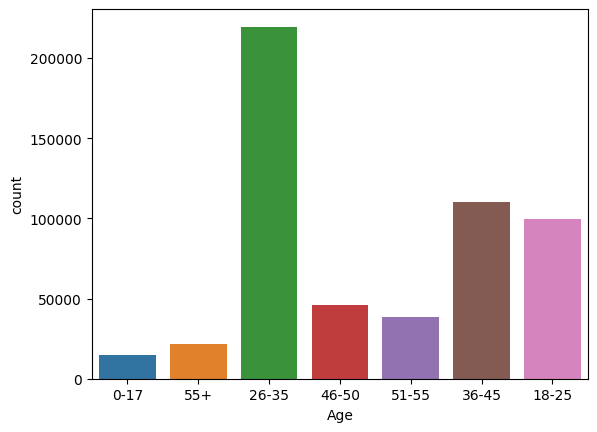

In [ ]:
sns.countplot(data = w, x='Age')

In [ ]:
w['Occupation'].value_counts()

4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64

<Axes: xlabel='Occupation', ylabel='count'>

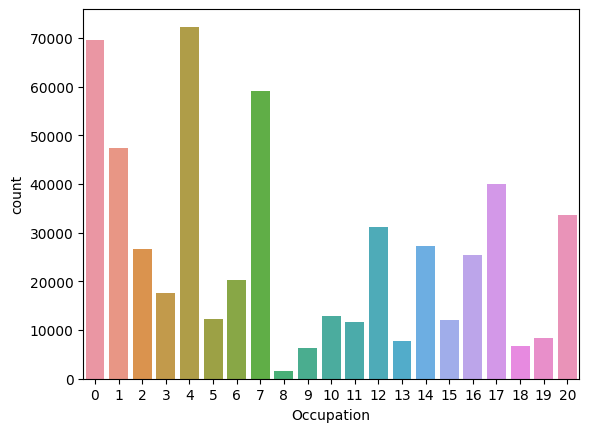

In [ ]:
sns.countplot(data = w, x='Occupation')

In [ ]:
# Around 70000 purchases have been made by people with occupation 0, 4 followed by 59000 puchases in occupation 7.
# Then we could see people in occupation 1 hav purchased around 48000 purchases

In [ ]:
total_user_by_ageaAndOccupation = w.groupby(['Age','Occupation'])['User_ID'].nunique()
total_user_by_ageaAndOccupation

Age   Occupation
0-17  0             26
      1              4
      2              3
      4              3
      7              2
                    ..
55+   16            24
      17            22
      18             2
      19             2
      20            11
Name: User_ID, Length: 134, dtype: int64

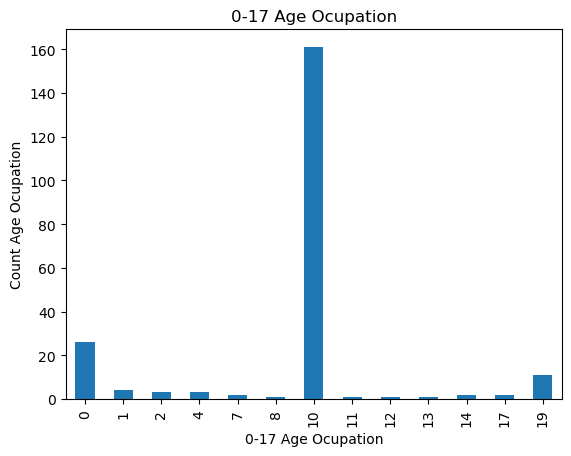

In [ ]:
total_user_by_ageaAndOccupation.loc['0-17'].plot(kind='bar')
plt.title('0-17 Age Ocupation')
plt.xlabel('0-17 Age Ocupation')
plt.ylabel('Count Age Ocupation')
plt.show()

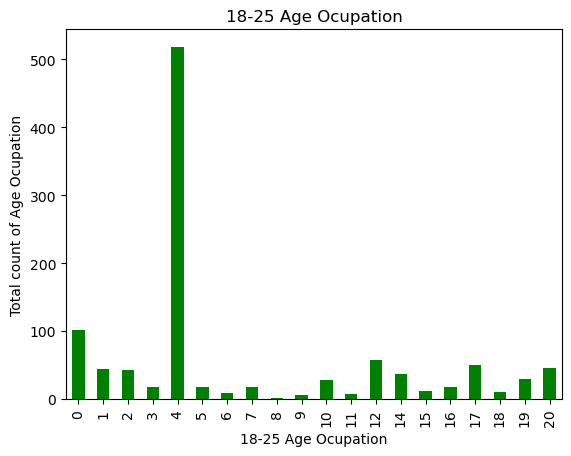

In [ ]:
total_user_by_ageaAndOccupation.loc['18-25'].plot(kind='bar',color = 'g')
plt.title('18-25 Age Ocupation')
plt.xlabel('18-25 Age Ocupation')
plt.ylabel('Total count of Age Ocupation')
plt.show()

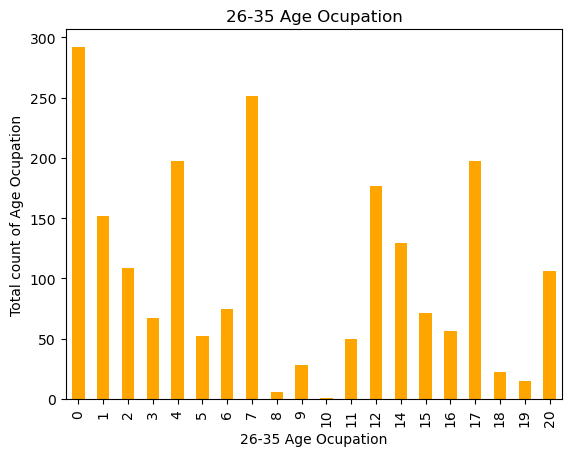

In [ ]:
total_user_by_ageaAndOccupation.loc['26-35'].plot(kind='bar',color = 'orange')
plt.title('26-35 Age Ocupation')
plt.xlabel('26-35 Age Ocupation')
plt.ylabel('Total count of Age Ocupation')
plt.show()

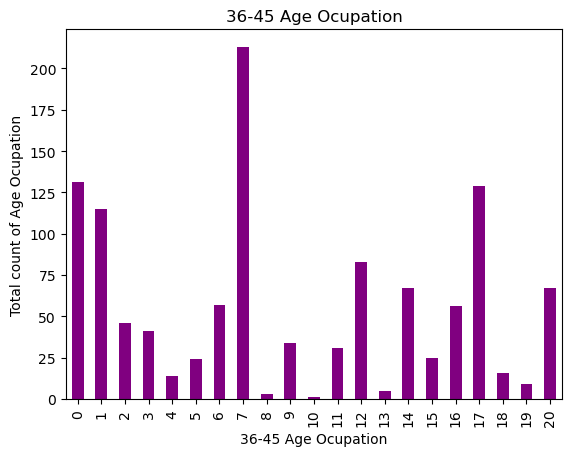

In [ ]:
total_user_by_ageaAndOccupation.loc['36-45'].plot(kind='bar',color = 'purple')
plt.title('36-45 Age Ocupation')
plt.xlabel('36-45 Age Ocupation')
plt.ylabel('Total count of Age Ocupation')
plt.show()

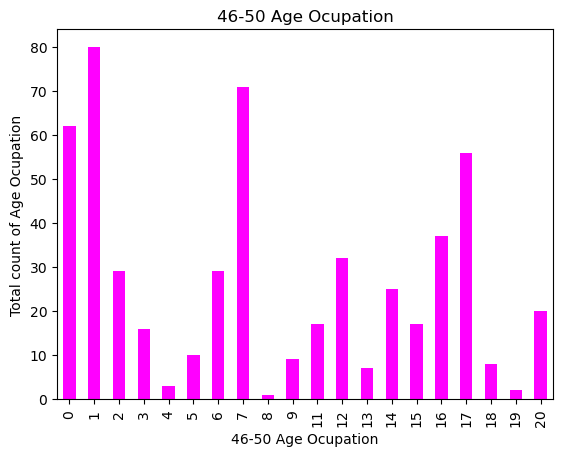

In [ ]:
total_user_by_ageaAndOccupation.loc['46-50'].plot(kind='bar',color = 'magenta')
plt.title('46-50 Age Ocupation')
plt.xlabel('46-50 Age Ocupation')
plt.ylabel('Total count of Age Ocupation')
plt.show()

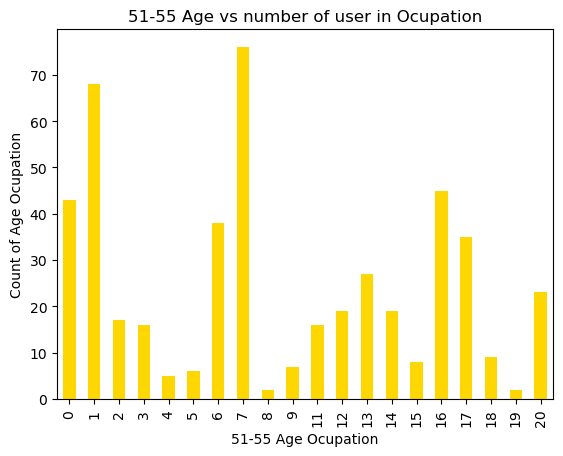

In [ ]:
total_user_by_ageaAndOccupation.loc['51-55'].plot(kind='bar',color = 'gold')
plt.title('51-55 Age vs number of user in Ocupation')
plt.xlabel('51-55 Age Ocupation')
plt.ylabel('Count of Age Ocupation')
plt.show()

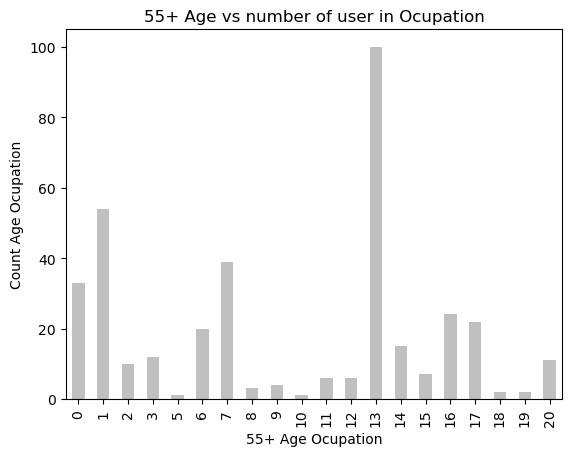

In [ ]:
total_user_by_ageaAndOccupation.loc['55+'].plot(kind='bar',color = 'silver')
plt.title('55+ Age vs number of user in Ocupation')
plt.xlabel('55+ Age Ocupation')
plt.ylabel('Count Age Ocupation')
plt.show()

In [ ]:
#From the above above all plots we could see on the count of users ocupation in their respective health category

In [ ]:
total_user_by_GenderAndOccupation = w.groupby(['Gender','Occupation'])['User_ID'].nunique()
total_user_by_GenderAndOccupation

Gender  Occupation
F       0             226
        1             203
        2              88
        3              98
        4             228
        5              31
        6              99
        7             137
        8               3
        9              85
        10             66
        11             22
        12             46
        13             33
        14             78
        15             28
        16             49
        17             50
        18              4
        19             15
        20             77
M       0             462
        1             314
        2             168
        3              72
        4             512
        5              80
        6             129
        7             532
        8              14
        9               3
        10            126
        11            106
        12            330
        13            107
        14            216
        15            112
        16         

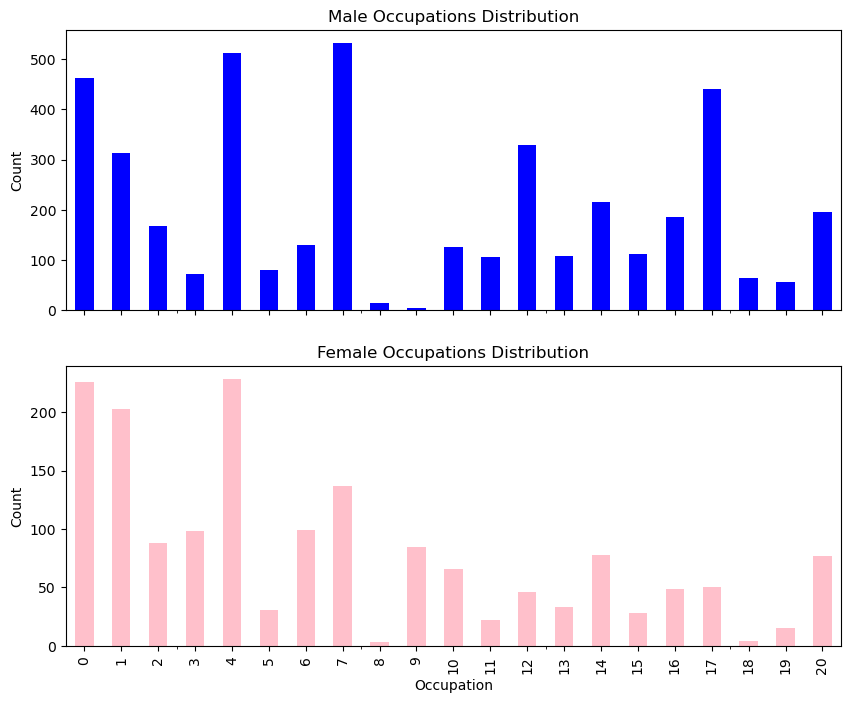

In [ ]:
# Group by 'Gender' and 'Occupation' and get the counts
total_user_by_GenderAndOccupation = w.groupby(['Gender','Occupation'])['User_ID'].nunique()

# Unstack the data to create a DataFrame suitable for plotting
data_to_plot = total_user_by_GenderAndOccupation.unstack()

# Plot histograms separately for male and female
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8), sharex=True)

data_to_plot.loc['M'].plot(kind='bar', ax=axes[0], color='blue', title='Male Occupations Distribution')
axes[0].set_ylabel('Count')

data_to_plot.loc['F'].plot(kind='bar', ax=axes[1], color='pink', title='Female Occupations Distribution')
axes[1].set_ylabel('Count')

plt.xlabel('Occupation')
plt.show()


In [ ]:
w['City_Category'].value_counts()

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

In [ ]:
# we could see that the city C has done the highest number of puchases followed by City B

<Axes: xlabel='City_Category', ylabel='count'>

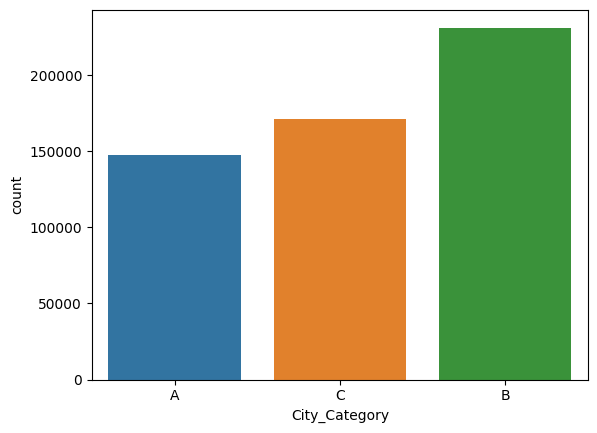

In [ ]:
sns.countplot(data = w, x='City_Category')

In [ ]:
total_purchases_city = w.groupby('City_Category')['Purchase'].sum()
total_purchases_city

City_Category
A    1316471661
B    2115533605
C    1663807476
Name: Purchase, dtype: int64

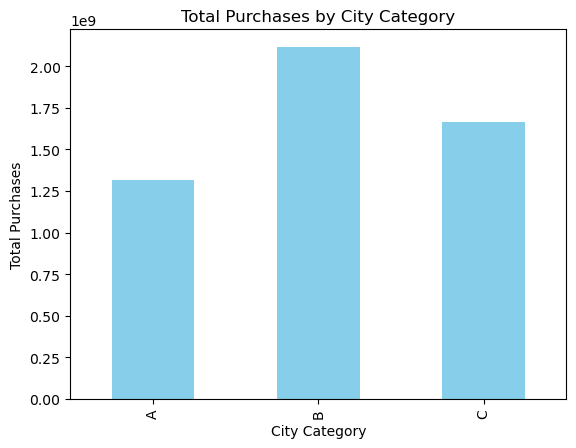

In [ ]:
# Group by 'City_Category' and sum the 'Purchase' amounts
total_purchases_city = w.groupby('City_Category')['Purchase'].sum()

# Plotting
total_purchases_city.plot(kind='bar', color='skyblue')
plt.title('Total Purchases by City Category')
plt.xlabel('City Category')
plt.ylabel('Total Purchases')
plt.show()

In [ ]:
total_Maleand_Female_in_city = w.groupby(['City_Category','Gender'])['User_ID'].nunique()
total_Maleand_Female_in_city

City_Category  Gender
A              F          295
               M          750
B              F          503
               M         1204
C              F          868
               M         2271
Name: User_ID, dtype: int64

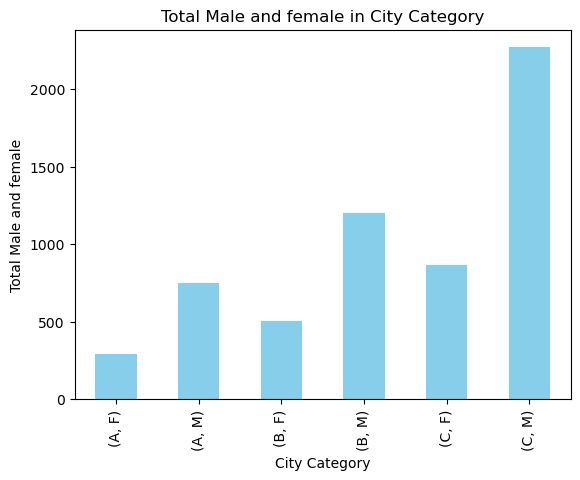

In [ ]:
total_Maleand_Female_in_city = w.groupby(['City_Category','Gender'])['User_ID'].nunique()

# Plotting
total_Maleand_Female_in_city.plot(kind='bar', color='skyblue')
plt.title('Total Male and female in City Category')
plt.xlabel('City Category')
plt.ylabel('Total Male and female')
plt.show()

In [ ]:
# we could observe almost twice the more number of males in each city compared to the females

In [ ]:
total_Marital_Status_in_city = w.groupby(['City_Category','Marital_Status'])['User_ID'].nunique()
total_Marital_Status_in_city

City_Category  Marital_Status
A              Married            393
               UnMarried          652
B              Married            703
               UnMarried         1004
C              Married           1378
               UnMarried         1761
Name: User_ID, dtype: int64

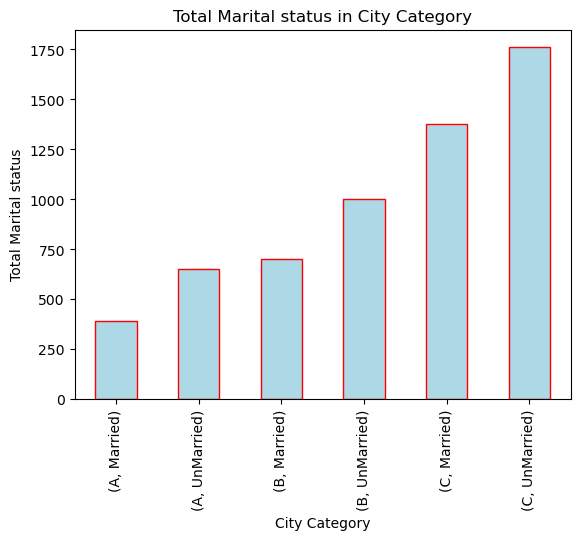

In [ ]:
total_Marital_Status_in_city = w.groupby(['City_Category','Marital_Status'])['User_ID'].nunique()

# Plotting
total_Marital_Status_in_city.plot(kind='bar', color='lightblue', edgecolor='red')
plt.title('Total Marital status in City Category')
plt.xlabel('City Category')
plt.ylabel('Total Marital status')
plt.show()

In [ ]:
# we could see there are more unmarried people In each city than the married people

In [ ]:
total_Marital_Status_in_city_age_Cat = w.groupby(['City_Category','Age','Marital_Status'])['User_ID'].nunique()
total_Marital_Status_in_city_age_Cat

City_Category  Age    Marital_Status
A              0-17   UnMarried          25
               18-25  Married            43
                      UnMarried         171
               26-35  Married           167
                      UnMarried         294
               36-45  Married            71
                      UnMarried         105
               46-50  Married            39
                      UnMarried          14
               51-55  Married            46
                      UnMarried          21
               55+    Married            27
                      UnMarried          22
B              0-17   UnMarried          50
               18-25  Married            84
                      UnMarried         247
               26-35  Married           251
                      UnMarried         401
               36-45  Married           124
                      UnMarried         211
               46-50  Married           107
                      UnMarried        

In [ ]:
total_purchases_Marital_Status_in_city_age_Cat = w.groupby(['City_Category','Age','Marital_Status'])['Product_ID'].nunique()
total_purchases_Marital_Status_in_city_age_Cat

City_Category  Age    Marital_Status
A              0-17   UnMarried         1325
               18-25  Married           2018
                      UnMarried         2569
               26-35  Married           2948
                      UnMarried         3113
               36-45  Married           2536
                      UnMarried         2691
               46-50  Married           2013
                      UnMarried         1579
               51-55  Married           1619
                      UnMarried          959
               55+    Married           1252
                      UnMarried         1003
B              0-17   UnMarried         1763
               18-25  Married           2240
                      UnMarried         2724
               26-35  Married           2941
                      UnMarried         3026
               36-45  Married           2612
                      UnMarried         2836
               46-50  Married           2598
                  

In [ ]:
# From the above we could see the number of product purchaseds in each city age wise category with respect to their Marital status

In [ ]:
w['Product_ID'].nunique()

3631

In [ ]:
# From the above we could the count of the users in each age category and whether they are married or not

In [ ]:
Number_male_and_female_yearwise = w.groupby(['Stay_In_Current_City_Years','Gender'])['User_ID'].nunique()
Number_male_and_female_yearwise

Stay_In_Current_City_Years  Gender
0                           F          214
                            M          558
1                           F          604
                            M         1482
2                           F          328
                            M          817
3                           F          286
                            M          693
4+                          F          234
                            M          675
Name: User_ID, dtype: int64

In [ ]:
total_years_of_stay_in_city = w.groupby(['Gender','Stay_In_Current_City_Years'])['User_ID'].nunique()
total_years_of_stay_in_city

Gender  Stay_In_Current_City_Years
F       0                              214
        1                              604
        2                              328
        3                              286
        4+                             234
M       0                              558
        1                             1482
        2                              817
        3                              693
        4+                             675
Name: User_ID, dtype: int64

In [ ]:
# We could see most of the Male and Female are in the city at least 1 year.

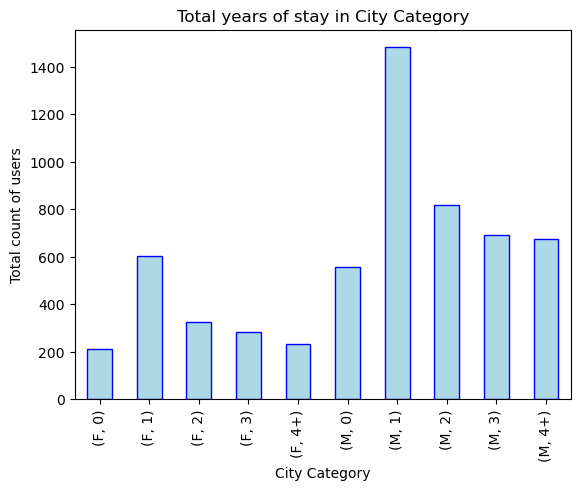

In [ ]:
total_years_of_stay_in_city = w.groupby(['Gender','Stay_In_Current_City_Years'])['User_ID'].nunique()
# Plotting
total_years_of_stay_in_city.plot(kind='bar', color='lightblue', edgecolor='blue')
plt.title('Total years of stay in City Category')
plt.xlabel('City Category')
plt.ylabel('Total count of users')
plt.show()

In [ ]:
total_user_MarriedorUnmarried = w.groupby('Marital_Status')['User_ID'].nunique()
total_user_MarriedorUnmarried

Marital_Status
Married      2474
UnMarried    3417
Name: User_ID, dtype: int64

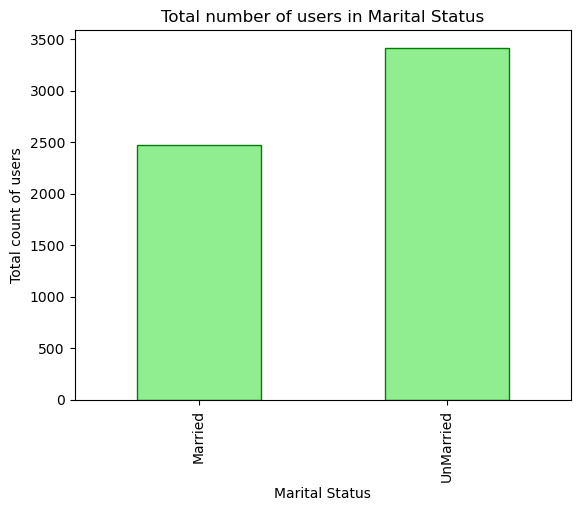

In [ ]:
total_user_MarriedorUnmarried = w.groupby('Marital_Status')['User_ID'].nunique()
# Plotting
total_user_MarriedorUnmarried.plot(kind='bar', color='lightgreen', edgecolor='blue')
plt.title('Total number of users in Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Total count of users')
plt.show()

In [ ]:
# Top 10 Product ID purchased by Male and Female
top_products_by_gender = w.groupby(['Gender', 'Product_ID'])['Purchase'].sum().reset_index()
top_products_male = top_products_by_gender[top_products_by_gender['Gender'] == 'M'].nlargest(10, 'Purchase')
top_products_female = top_products_by_gender[top_products_by_gender['Gender'] == 'F'].nlargest(10, 'Purchase')

# Top 10 Product ID purchased by Married and Unmarried
top_products_by_marital_status = w.groupby(['Marital_Status', 'Product_ID'])['Purchase'].sum().reset_index()
top_products_married = top_products_by_marital_status[top_products_by_marital_status['Marital_Status'] == 1].nlargest(10, 'Purchase')
top_products_unmarried = top_products_by_marital_status[top_products_by_marital_status['Marital_Status'] == 0].nlargest(10, 'Purchase')

# Top 10 Product ID purchased by City Category
top_products_by_city = w.groupby(['City_Category', 'Product_ID'])['Purchase'].sum().reset_index()
top_products_city_A = top_products_by_city[top_products_by_city['City_Category'] == 'A'].nlargest(10, 'Purchase')
top_products_city_B = top_products_by_city[top_products_by_city['City_Category'] == 'B'].nlargest(10, 'Purchase')
top_products_city_C = top_products_by_city[top_products_by_city['City_Category'] == 'C'].nlargest(10, 'Purchase')

# Top 10 Product ID purchased by Age
top_products_by_age = w.groupby(['Age', 'Product_ID'])['Purchase'].sum().reset_index()
top_products_age = top_products_by_age.groupby('Age').apply(lambda x: x.nlargest(10, 'Purchase')).reset_index(drop=True)

# Top 10 User_ID to their top purchases individually for Male and Female
top_user_purchases_male = w[w['Gender'] == 'M'].groupby('User_ID')['Purchase'].sum().nlargest(10)

top_user_purchases_female = w[w['Gender'] == 'F'].groupby('User_ID')['Purchase'].sum().nlargest(10)

# Top 10 User_ID to their sum of purchases individually for Male and Female
top_user_sum_purchases_male = w[w['Gender'] == 'M'].groupby('User_ID')['Purchase'].sum().nlargest(10)

top_user_sum_purchases_female = w[w['Gender'] == 'F'].groupby('User_ID')['Purchase'].sum().nlargest(10)

In [ ]:
# Display the results
print("Top 10 Product ID purchased by Male:")
print(top_products_male)

Top 10 Product ID purchased by Male:
     Gender Product_ID  Purchase
3612      M  P00025442  22130146
4367      M  P00110742  20957437
5088      M  P00184942  19511115
3924      M  P00057642  19305959
4381      M  P00112142  19217614
5600      M  P00237542  18837006
4369      M  P00110942  18488069
5779      M  P00255842  18310751
3941      M  P00059442  18188807
3470      M  P00010742  17727417


In [ ]:
print("\nTop 10 Product ID purchased by Female:")
print(top_products_female)



Top 10 Product ID purchased by Female:
     Gender Product_ID  Purchase
2279      F  P00255842   6858212
557       F  P00059442   6149536
929       F  P00110842   6041427
238       F  P00025442   5865020
928       F  P00110742   5764872
1285      F  P00148642   5205713
930       F  P00110942   5151495
942       F  P00112142   4998392
271       F  P00028842   4981274
1616      F  P00184942   4823772


In [ ]:
#From the above we could see the top products that were purchased by both Male and Female

In [ ]:
print("\nTop 10 Product ID purchased by City Category A:")
print(top_products_city_A)


Top 10 Product ID purchased by City Category A:
     City_Category Product_ID  Purchase
240              A  P00025442   5471513
563              A  P00059442   5447499
2355             A  P00255842   5439812
966              A  P00110742   5373062
968              A  P00110942   5066935
967              A  P00110842   5047842
506              A  P00052842   4973571
2179             A  P00237542   4806521
547              A  P00057642   4785523
273              A  P00028842   4749577


In [ ]:
print("\nTop 10 Product ID purchased by City Category B:")
print(top_products_city_B)


Top 10 Product ID purchased by City Category B:
     City_Category Product_ID  Purchase
4428             B  P00110742  10005741
3713             B  P00025442   9865100
4033             B  P00059442   8973276
5128             B  P00184942   8822830
5627             B  P00237542   8638106
3746             B  P00028842   8544698
4430             B  P00110942   8508310
5798             B  P00255842   8454901
3577             B  P00010742   8414463
4442             B  P00112142   8358296


In [ ]:
print("\nTop 10 Product ID purchased by City Category C:")
print(top_products_city_C)


Top 10 Product ID purchased by City Category C:
     City_Category Product_ID  Purchase
7166             C  P00025442  12658553
7862             C  P00110742  11343506
9207             C  P00255842  11274250
7876             C  P00112142  11207578
8542             C  P00184942  11137180
7469             C  P00057642  10151322
7864             C  P00110942  10064319
9034             C  P00237542   9980949
7029             C  P00010742   9927668
7485             C  P00059442   9917568


In [ ]:
# The above identify the top 10 number products that are purchased in each city

In [ ]:
print("\nTop 10 Product ID purchased by Age:")
print(top_products_age)



Top 10 Product ID purchased by Age:
     Age Product_ID  Purchase
0   0-17  P00255842   1112854
1   0-17  P00237542    965999
2   0-17  P00145042    950906
3   0-17  P00112142    931216
4   0-17  P00025442    852540
..   ...        ...       ...
65   55+  P00110942    998670
66   55+  P00116142    976456
67   55+  P00010742    970687
68   55+  P00110742    932624
69   55+  P00148642    927859

[70 rows x 3 columns]


In [ ]:
print("\nTop 10 User_ID to their top purchases individually for Male:")
print(top_user_purchases_male)


Top 10 User_ID to their top purchases individually for Male:
User_ID
1004277    10536909
1001680     8699596
1002909     7577756
1001941     6817493
1000424     6573609
1004448     6566245
1005831     6512433
1001015     6511314
1003391     6477160
1001181     6387961
Name: Purchase, dtype: int64


In [ ]:
print("\nTop 10 User_ID to their top purchases individually for Female:")
print(top_user_purchases_female)


Top 10 User_ID to their top purchases individually for Female:
User_ID
1003539    6187094
1003224    5673106
1001088    5628655
1001448    5136424
1003292    4799461
1001150    4728932
1005643    4531525
1003067    4453785
1001203    4179027
1002529    4135916
Name: Purchase, dtype: int64


In [ ]:
# Top 10 Product ID purchased by Married and Unmarried
top_products_by_marital_status = w.groupby(['Marital_Status', 'Product_ID'])['Purchase'].sum().reset_index()
top_products_married = top_products_by_marital_status[top_products_by_marital_status['Marital_Status'] == 'Married'].nlargest(10, 'Purchase')
top_products_unmarried = top_products_by_marital_status[top_products_by_marital_status['Marital_Status'] == 'UnMarried'].nlargest(10, 'Purchase')

# Display the results
print("\nTop 10 Product ID purchased by Married:")
print(top_products_married)

print("\nTop 10 Product ID purchased by Unmarried:")
print(top_products_unmarried)


Top 10 Product ID purchased by Married:
     Marital_Status Product_ID  Purchase
242         Married  P00025442  11263308
970         Married  P00110742  10664727
1680        Married  P00184942  10210665
569         Married  P00059442  10080069
2363        Married  P00255842   9739614
984         Married  P00112142   9582405
972         Married  P00110942   9424506
102         Married  P00010742   9372353
553         Married  P00057642   9218993
1338        Married  P00148642   9125285

Top 10 Product ID purchased by Unmarried:
     Marital_Status Product_ID  Purchase
3758      UnMarried  P00025442  16731858
4493      UnMarried  P00110742  16057582
5890      UnMarried  P00255842  15429349
4507      UnMarried  P00112142  14633601
5713      UnMarried  P00237542  14457353
4083      UnMarried  P00059442  14258274
4495      UnMarried  P00110942  14215058
5205      UnMarried  P00184942  14124222
4067      UnMarried  P00057642  13883787
3791      UnMarried  P00028842  13238560


In [ ]:
# Least 10 Product ID purchased by Male and Female
least_products_by_gender = w.groupby(['Gender', 'Product_ID'])['Purchase'].sum().reset_index()
least_products_male = least_products_by_gender[least_products_by_gender['Gender'] == 'M'].nsmallest(10, 'Purchase')
least_products_female = least_products_by_gender[least_products_by_gender['Gender'] == 'F'].nsmallest(10, 'Purchase')

# Least 10 Product ID purchased by Married and Unmarried
least_products_by_marital_status = w.groupby(['Marital_Status', 'Product_ID'])['Purchase'].sum().reset_index()
least_products_married = least_products_by_marital_status[least_products_by_marital_status['Marital_Status'] == 'Married'].nsmallest(10, 'Purchase')
least_products_unmarried = least_products_by_marital_status[least_products_by_marital_status['Marital_Status'] == 'UnMarried'].nsmallest(10, 'Purchase')

# Least 10 Product ID purchased by City Category
least_products_by_city = w.groupby(['City_Category', 'Product_ID'])['Purchase'].sum().reset_index()
least_products_city_A = least_products_by_city[least_products_by_city['City_Category'] == 'A'].nsmallest(10, 'Purchase')
least_products_city_B = least_products_by_city[least_products_by_city['City_Category'] == 'B'].nsmallest(10, 'Purchase')
least_products_city_C = least_products_by_city[least_products_by_city['City_Category'] == 'C'].nsmallest(10, 'Purchase')

# Least 10 Product ID purchased by Age
least_products_by_age = w.groupby(['Age', 'Product_ID'])['Purchase'].sum().reset_index()
least_products_age = least_products_by_age.groupby('Age').apply(lambda x: x.nsmallest(10, 'Purchase')).reset_index(drop=True)

# Least 10 User_ID to their least purchases individually for Male and Female
least_user_purchases_male = w[w['Gender'] == 'M'].groupby('User_ID')['Purchase'].sum().nsmallest(10)

least_user_purchases_female = w[w['Gender'] == 'F'].groupby('User_ID')['Purchase'].sum().nsmallest(10)

# Least 10 User_ID to their sum of least purchases individually for Male and Female
least_user_sum_purchases_male = w[w['Gender'] == 'M'].groupby('User_ID')['Purchase'].sum().nsmallest(10)

least_user_sum_purchases_female = w[w['Gender'] == 'F'].groupby('User_ID')['Purchase'].sum().nsmallest(10)



In [ ]:
# Display the results
print("\nLeast 10 Product ID purchased by Male:")
print(least_products_male)


Least 10 Product ID purchased by Male:
     Gender Product_ID  Purchase
4243      M  P00091742       405
5272      M  P00203742       561
5945      M  P00272742      1430
6715      M  P00353042      1545
6446      M  P00325342      1656
3490      M  P00012942      1717
6086      M  P00287042      1739
4297      M  P00103542      1744
4302      M  P00104042      1745
6760      M  P00357542      1791


In [ ]:
print("\nLeast 10 Product ID purchased by Female:")
print(least_products_female)


Least 10 Product ID purchased by Female:
     Gender Product_ID  Purchase
588       F  P00063242       389
2755      F  P00309042       726
2437      F  P00272742      1390
2514      F  P00281442      1512
1793      F  P00203742      1542
2600      F  P00290442      1543
2969      F  P00333842      1569
3287      F  P00369242      1610
2172      F  P00244542      1612
3283      F  P00368742      1613


In [ ]:
print("\nLeast 10 Product ID purchased by Married:")
print(least_products_married)


Least 10 Product ID purchased by Married:
     Marital_Status Product_ID  Purchase
2859        Married  P00309042       726
1863        Married  P00203742       785
600         Married  P00063242       960
2480        Married  P00268042      1495
3162        Married  P00341042      1523
3277        Married  P00353042      1545
2609        Married  P00281342      1609
3011        Married  P00325342      1656
2724        Married  P00293442      1714
3375        Married  P00363042      1719


In [ ]:
print("\nLeast 10 Product ID purchased by Unmarried:")
print(least_products_unmarried)


Least 10 Product ID purchased by Unmarried:
     Marital_Status Product_ID  Purchase
6254      UnMarried  P00293442       200
4372      UnMarried  P00091742       405
5389      UnMarried  P00203742      1318
4115      UnMarried  P00063242      1530
6226      UnMarried  P00290442      1543
6684      UnMarried  P00341042      1632
6527      UnMarried  P00324042      1679
3636      UnMarried  P00012942      1717
6395      UnMarried  P00309742      1729
6192      UnMarried  P00287042      1739


In [ ]:
print("\nLeast 10 Product ID purchased by City Category A:")
print(least_products_city_A)


Least 10 Product ID purchased by City Category A:
     City_Category Product_ID  Purchase
2711             A  P00293442       200
1861             A  P00203742       757
594              A  P00063242      1136
2516             A  P00272742      1390
879              A  P00101642      1402
2599             A  P00281342      1705
3295             A  P00358542      1738
903              A  P00104042      1745
3402             A  P00369842      1823
1077             A  P00121842      1827


In [ ]:
print("\nLeast 10 Product ID purchased by City Category B:")
print(least_products_city_B)


Least 10 Product ID purchased by City Category B:
     City_Category Product_ID  Purchase
5308             B  P00203742       219
6291             B  P00309042       726
6156             B  P00293442       969
4063             B  P00063242      1354
6699             B  P00353042      1545
5818             B  P00257942      1574
6597             B  P00342542      1577
5607             B  P00235142      1891
6132             B  P00290842      1929
6064             B  P00283742      1987


In [ ]:
print("\nLeast 10 Product ID purchased by City Category C:")
print(least_products_city_C)


Least 10 Product ID purchased by City Category C:
     City_Category Product_ID  Purchase
7753             C  P00091742       405
7786             C  P00101642       699
9559             C  P00293442       745
8071             C  P00132342       759
8718             C  P00203742      1127
9373             C  P00273842      1150
8696             C  P00200742      1343
9362             C  P00272742      1430
8411             C  P00171242      1510
9444             C  P00281442      1512


In [ ]:
print("\nLeast 10 Product ID purchased by Age:")
print(least_products_age)


Least 10 Product ID purchased by Age:
     Age Product_ID  Purchase
0   0-17  P00025142       375
1   0-17  P00041442       383
2   0-17  P00331242       386
3   0-17  P00175342       704
4   0-17  P00066742       741
..   ...        ...       ...
65   55+  P00316942      1413
66   55+  P00272742      1430
67   55+  P00185542      1477
68   55+  P00075642      1492
69   55+  P00082442      1500

[70 rows x 3 columns]


In [ ]:
print("\nLeast 10 User_ID to their least purchases individually for Male:")
print(least_user_purchases_male)


Least 10 User_ID to their least purchases individually for Male:
User_ID
1000094    49288
1003883    49349
1002111    54536
1003275    55960
1004636    57805
1000708    58625
1002696    59105
1005391    60182
1000572    60789
1005608    61628
Name: Purchase, dtype: int64


In [ ]:
print("\nLeast 10 User_ID to their least purchases individually for Female:")
print(least_user_purchases_female)


Least 10 User_ID to their least purchases individually for Female:
User_ID
1004464    46681
1005117    49668
1004991    52371
1005944    53996
1003291    55372
1003068    61972
1002488    62250
1004178    62753
1000986    64636
1004839    66471
Name: Purchase, dtype: int64


In [ ]:
print("\nLeast 10 User_ID to their sum of least purchases individually for Male:")
print(least_user_sum_purchases_male)


Least 10 User_ID to their sum of least purchases individually for Male:
User_ID
1000094    49288
1003883    49349
1002111    54536
1003275    55960
1004636    57805
1000708    58625
1002696    59105
1005391    60182
1000572    60789
1005608    61628
Name: Purchase, dtype: int64


In [ ]:
print("\nLeast 10 User_ID to their sum of least purchases individually for Female:")
print(least_user_sum_purchases_female)


Least 10 User_ID to their sum of least purchases individually for Female:
User_ID
1004464    46681
1005117    49668
1004991    52371
1005944    53996
1003291    55372
1003068    61972
1002488    62250
1004178    62753
1000986    64636
1004839    66471
Name: Purchase, dtype: int64


In [ ]:
import scipy.stats as stats

# Sample of female customers
sample_female = w[w['Gender'] == 'F']['Purchase']

# Sample statistics
sample_mean_female = round(sample_female.mean(),2)
sample_std_female = sample_female.std()
sample_size_female = len(sample_female)

# Confidence level
confidence_level = 0.95  # You can adjust this value as needed (e.g., 0.90 or 0.99)

# Degrees of freedom for t-distribution
degrees_of_freedom = sample_size_female - 1

# Margin of error
margin_of_error = stats.t.ppf((1 + confidence_level) / 2, degrees_of_freedom) * (sample_std_female / (sample_size_female ** 0.5))

# Confidence Interval
ci_lower = round((sample_mean_female - margin_of_error),2)
ci_upper = round((sample_mean_female + margin_of_error),2)

print(f"Sample Mean of Female Customers: {sample_mean_female}")
print(f"Confidence Interval for Population Average Spending of Female Customers: ({ci_lower}, {ci_upper})")

Sample Mean of Female Customers: 8734.57
Confidence Interval for Population Average Spending of Female Customers: (8709.22, 8759.92)


C:\Users\ariva\AppData\Local\Temp\ipykernel_18232\2152668352.py:24: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(sample_female, shade=True, color='skyblue', label='Female Customers KDE')


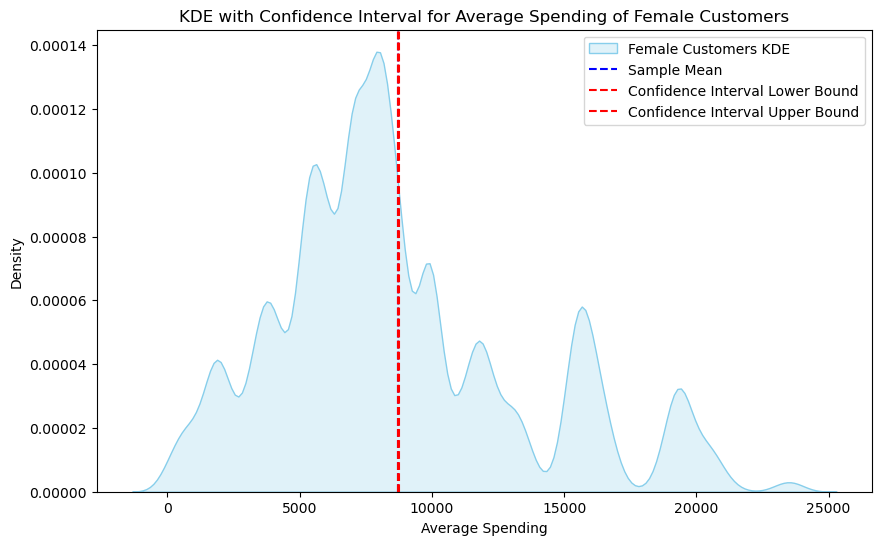

In [ ]:
# Sample of female customers
sample_female = w[w['Gender'] == 'F']['Purchase']

# Sample statistics
sample_mean_female = sample_female.mean()
sample_std_female = sample_female.std()
sample_size_female = len(sample_female)

# Confidence level
confidence_level = 0.95

# Degrees of freedom for t-distribution
degrees_of_freedom = sample_size_female - 1

# Margin of error
margin_of_error = stats.t.ppf((1 + confidence_level) / 2, degrees_of_freedom) * (sample_std_female / (sample_size_female ** 0.5))

# Confidence Interval
ci_lower = sample_mean_female - margin_of_error
ci_upper = sample_mean_female + margin_of_error

# Plotting
plt.figure(figsize=(10, 6))
sns.kdeplot(sample_female, shade=True, color='skyblue', label='Female Customers KDE')
plt.axvline(x=sample_mean_female, color='blue', linestyle='--', label='Sample Mean')
plt.axvline(x=ci_lower, color='red', linestyle='--', label='Confidence Interval Lower Bound')
plt.axvline(x=ci_upper, color='red', linestyle='--', label='Confidence Interval Upper Bound')
plt.title('KDE with Confidence Interval for Average Spending of Female Customers')
plt.xlabel('Average Spending')
plt.legend()
plt.show()


In [ ]:
w.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,UnMarried,3,8370
1,1000001,P00248942,F,0-17,10,A,2,UnMarried,1,15200
2,1000001,P00087842,F,0-17,10,A,2,UnMarried,12,1422
3,1000001,P00085442,F,0-17,10,A,2,UnMarried,12,1057
4,1000002,P00285442,M,55+,16,C,4+,UnMarried,8,7969


In [ ]:
w['Purchase'].value_counts()

7011     191
7193     188
6855     187
6891     184
7012     183
        ... 
23491      1
18345      1
3372       1
855        1
21489      1
Name: Purchase, Length: 18105, dtype: int64

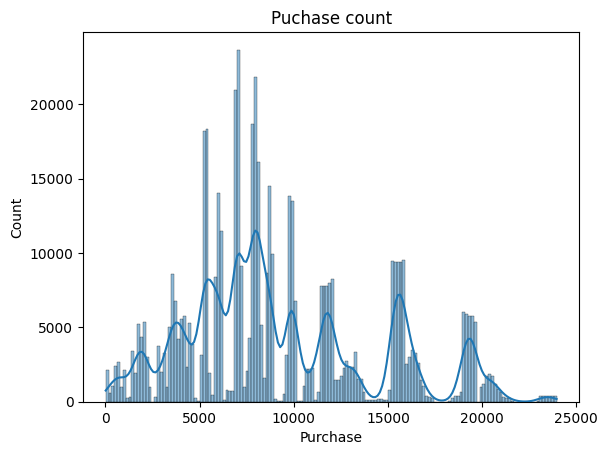

In [ ]:
sns.histplot(x = w['Purchase'], kde = 'True')
plt.title('Puchase count')
plt.show()

In [ ]:
# we could see from the above graph the items that was purchased for price between 5000 to 10000 have more in numbers

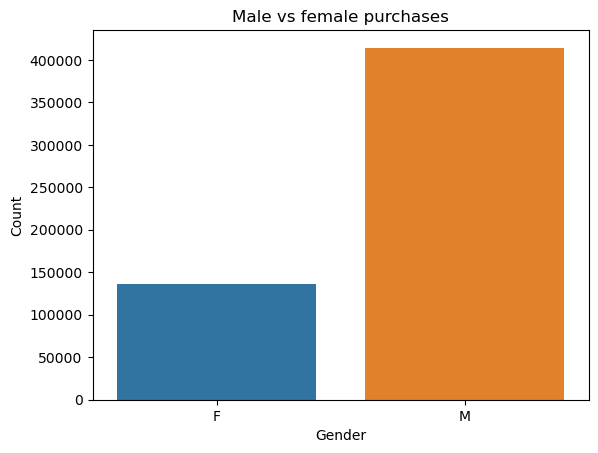

In [ ]:
sns.countplot(data = w, x='Gender')
plt.xlabel('Gender')  # Add an x-axis label if needed
plt.ylabel('Count')  # Add a y-axis label if needed
plt.title('Male vs female purchases')  # Add a title if needed
plt.show()

In [ ]:
# We could see the purchased made by male in total is 3909580100 which 3 times higher than the total purchased
# made by female which summed up to 1186232642

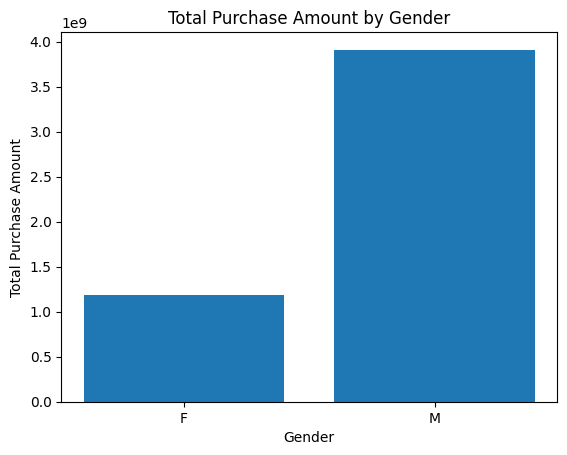

In [ ]:

purchase_by_gender = w.groupby('Gender')['Purchase'].sum()

# Extracting data for plotting
x_bar = purchase_by_gender.index
y_bar = purchase_by_gender.values

# Creating a bar chart
plt.bar(x_bar, y_bar)

# Adding labels and title
plt.xlabel('Gender')
plt.ylabel('Total Purchase Amount')
plt.title('Total Purchase Amount by Gender')

# Show the plot
plt.show()


In [ ]:
w_m = w.loc[w['Gender'] == 'M']
w_w = w.loc[w['Gender'] == 'F']

In [ ]:
w_m['Purchase'].sum()

3909580100

In [ ]:
w_w['Purchase'].sum()

1186232642

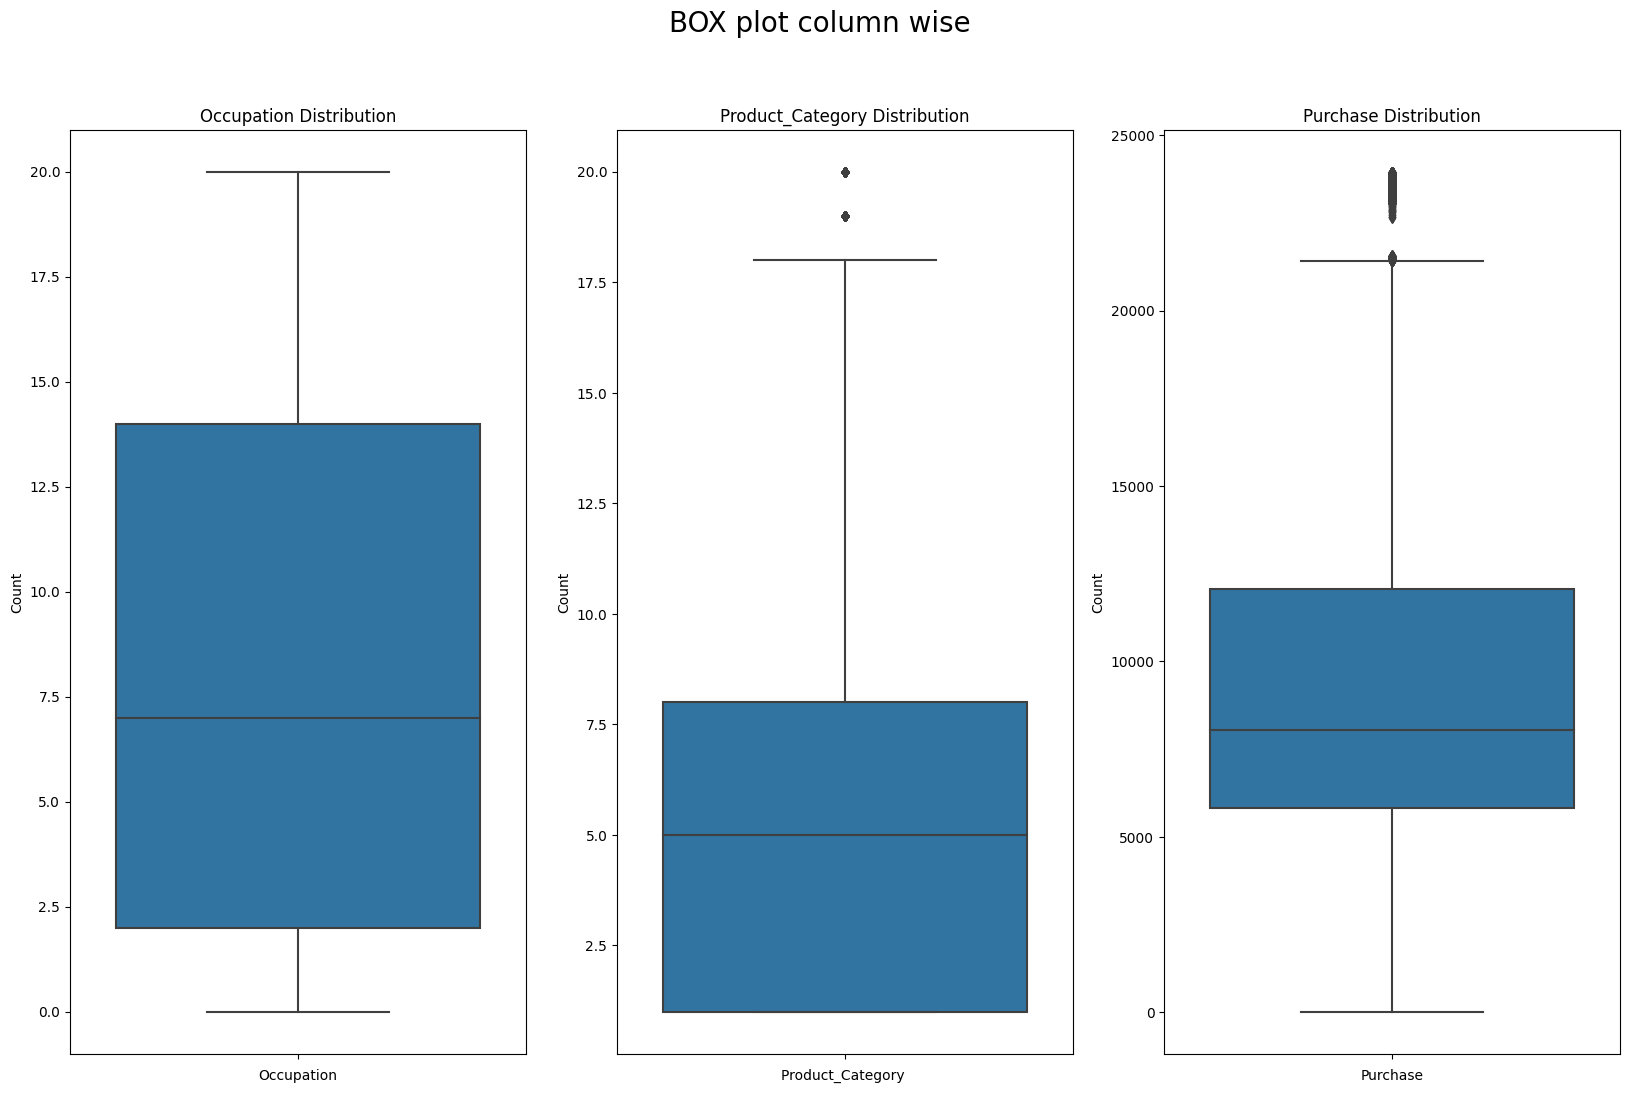

In [ ]:

plt.figure(figsize=(20, 12)).suptitle("BOX plot column wise", fontsize=20)

# First subplot
plt.subplot(1, 3, 1)
sns.boxplot(y=w['Occupation'])
plt.xlabel('Occupation')  # Add an x-axis label if needed
plt.ylabel('Count')  # Add a y-axis label if needed
plt.title('Occupation Distribution')  # Add a title if needed

# Second subplot
plt.subplot(1, 3, 2)
sns.boxplot(y=w['Product_Category'])
plt.xlabel('Product_Category ')  # Add an x-axis label if needed
plt.ylabel('Count')  # Add a y-axis label if needed
plt.title('Product_Category Distribution')  # Add a title if needed

# Third subplot
plt.subplot(1, 3, 3)
sns.boxplot(y=w['Purchase'])
plt.xlabel('Purchase')  # Add an x-axis label if needed
plt.ylabel('Count')  # Add a y-axis label if needed
plt.title('Purchase Distribution')  # Add a title if needed

plt.show()




In [ ]:
# The median of the occupation  category is around 6.7
# 75  percentile of the occupation  of the people who have purchased is below 14
# The median of the product category is 5 and 75 percentile of the products purchased are belo category 8.
# 75 percentile of the purchases are made below 12000 and median lies at around 7500

In [ ]:
### outliers
# The category 18 and 20 are the outliers of the product categories purchased
# we could also see few outliers on the purchases amount between 22000 a 25000

In [ ]:
w['Gender']

0         F
1         F
2         F
3         F
4         M
         ..
550063    M
550064    F
550065    F
550066    F
550067    F
Name: Gender, Length: 550068, dtype: object

In [ ]:
sales_men = w.loc[w['Gender'] == 'M']

<Axes: xlabel='Purchase', ylabel='Density'>

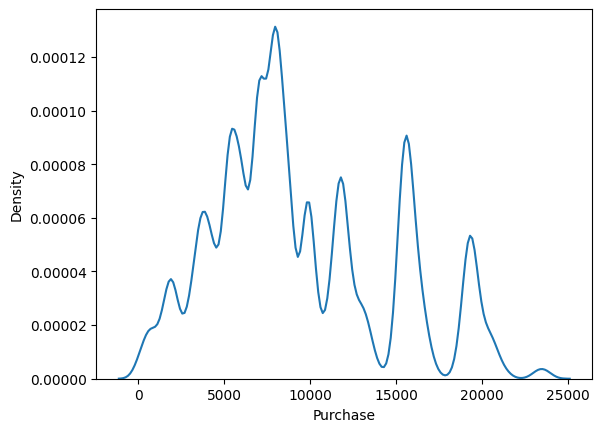

In [ ]:
sns.kdeplot(data = sales_men , x = 'Purchase' )

<Axes: xlabel='Purchase', ylabel='Density'>

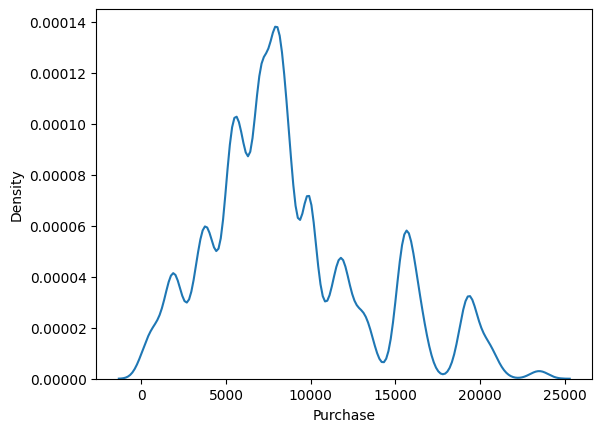

In [ ]:
sales_Women = w.loc[w['Gender'] == 'F']
sns.kdeplot(data = sales_Women , x = 'Purchase' )

<Axes: xlabel='Gender', ylabel='Purchase'>

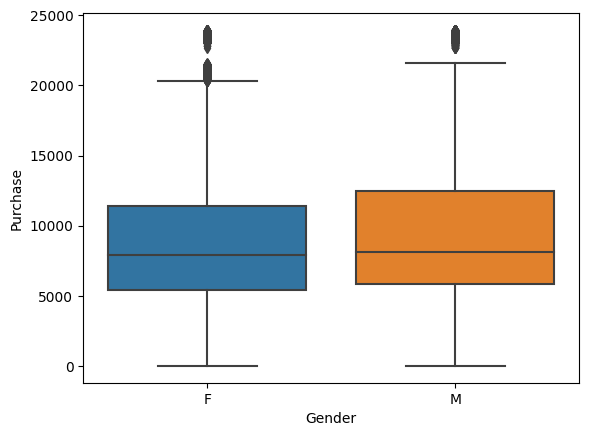

In [ ]:
sns.boxplot(data = w, x = 'Gender', y= 'Purchase' )

In [ ]:
# We could see the median is slightly higher for male in terms of purchase when compared with female
# The 75 percentile of the female purchases is below 11600 and for Male it is around 12500

In [ ]:
# Outliers
# We could see few outliers for female above 20000. The outliers here are a bit more compared to the Male
# We could see few outliers for male above 22000

<Axes: xlabel='Gender', ylabel='Purchase'>

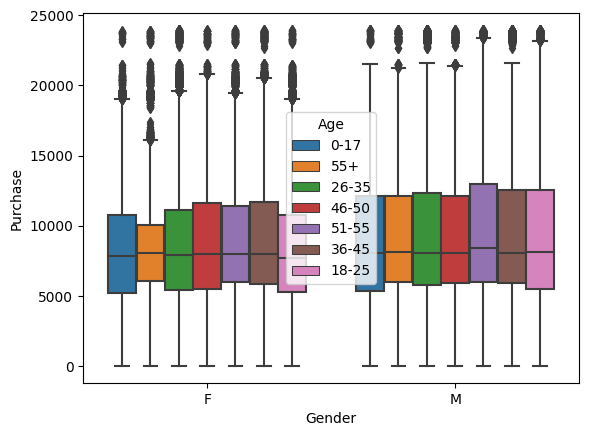

In [ ]:
sns.boxplot(data = w, x = 'Gender', y= 'Purchase', hue = 'Age' )

In [ ]:
# We could see there are lots of outliers in the age wise categories.
# for female there are more outliers comparatively than males.
# we could see that the 100 percentile of Male is more in terms of purchases

Text(0.5, 1.0, 'Gender vs Occupation Distribution')

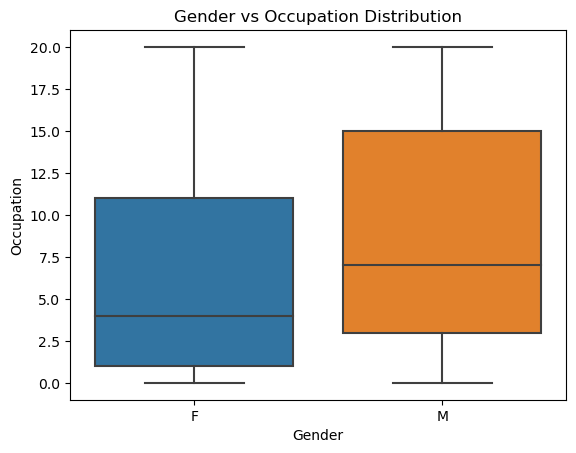

In [ ]:
sns.boxplot(data=w,x ='Gender', y ='Occupation')
plt.xlabel('Gender')  # Add an x-axis label if needed
plt.ylabel('Occupation')  # Add a y-axis label if needed
plt.title('Gender vs Occupation Distribution')

Text(0.5, 1.0, 'Gender vs Product_Category Distribution')

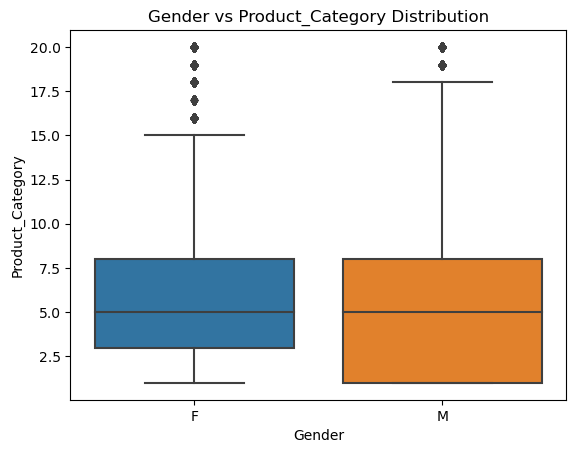

In [ ]:
sns.boxplot(data=w,x = 'Gender' , y = 'Product_Category')
plt.xlabel('Gender')  # Add an x-axis label if needed
plt.ylabel('Product_Category')  # Add a y-axis label if needed
plt.title('Gender vs Product_Category Distribution')


In [ ]:
# We could see most of the Male are between the occupation category of 3 to 15.
# For women it is between 1 to 11.
# Most of the Male have purchased the product between the product category 1 and 8.
# Most of the female have purchased between 3 to 8.

In [ ]:
## Outliers
# We could see the outliers for the product category for female are 16, 17, 18, 19 ,20.
# for Male we could see the Outliers are only product category of 19, 20.

Text(0.5, 1.0, 'Purchase vs Product_Category Distribution')

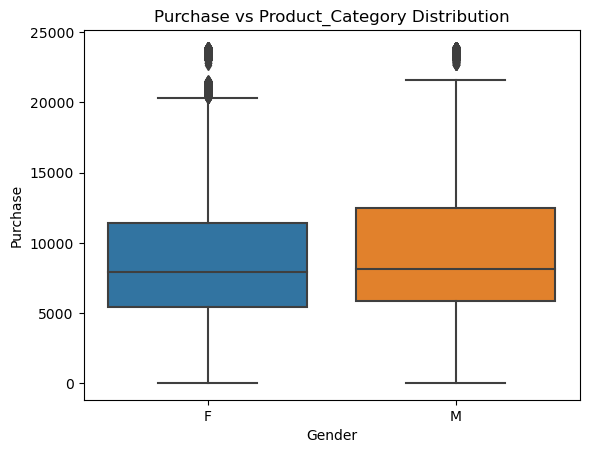

In [ ]:
sns.boxplot(data=w,x = 'Gender' , y = 'Purchase')
plt.xlabel('Gender')  # Add an x-axis label if needed
plt.ylabel('Purchase')  # Add a y-axis label if needed
plt.title('Purchase vs Product_Category Distribution')

Text(0.5, 1.0, 'Age vs Occupation Distribution')

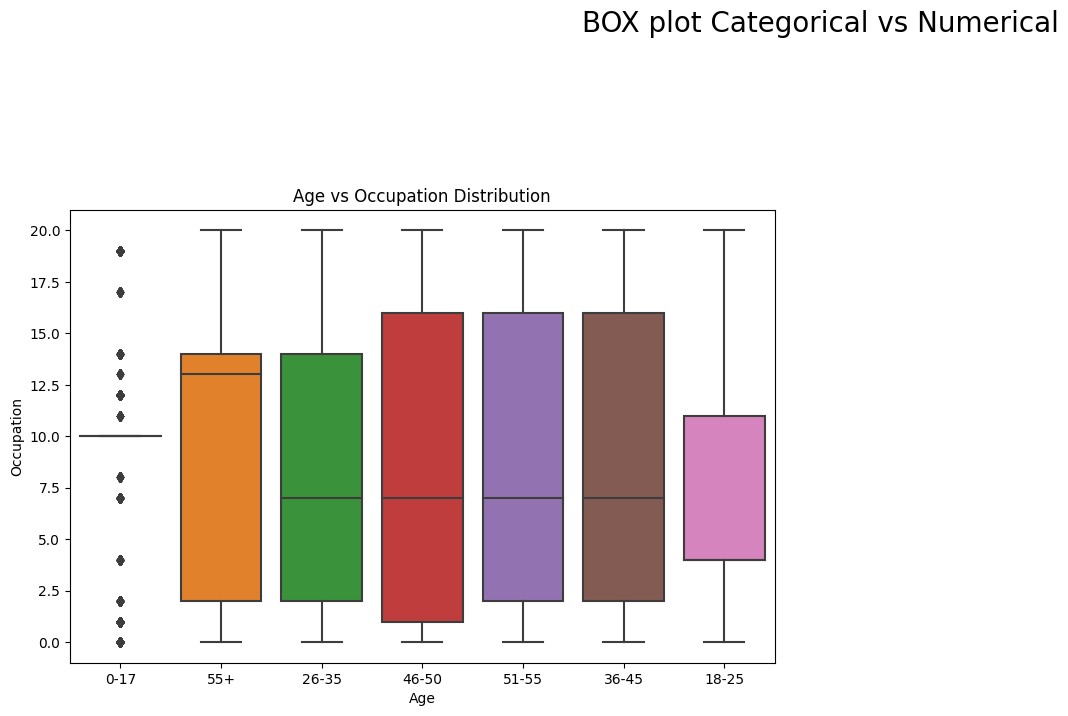

In [ ]:
plt.figure(figsize=(20, 20)).suptitle("BOX plot Categorical vs Numerical", fontsize=20)
plt.subplot(3,2,1)
sns.boxplot(data=w,x = 'Age' , y = 'Occupation')
plt.xlabel('Age')  # Add an x-axis label if needed
plt.ylabel('Occupation')  # Add a y-axis label if needed
plt.title('Age vs Occupation Distribution')

Text(0.5, 1.0, 'Age vs Product_Category Distribution')

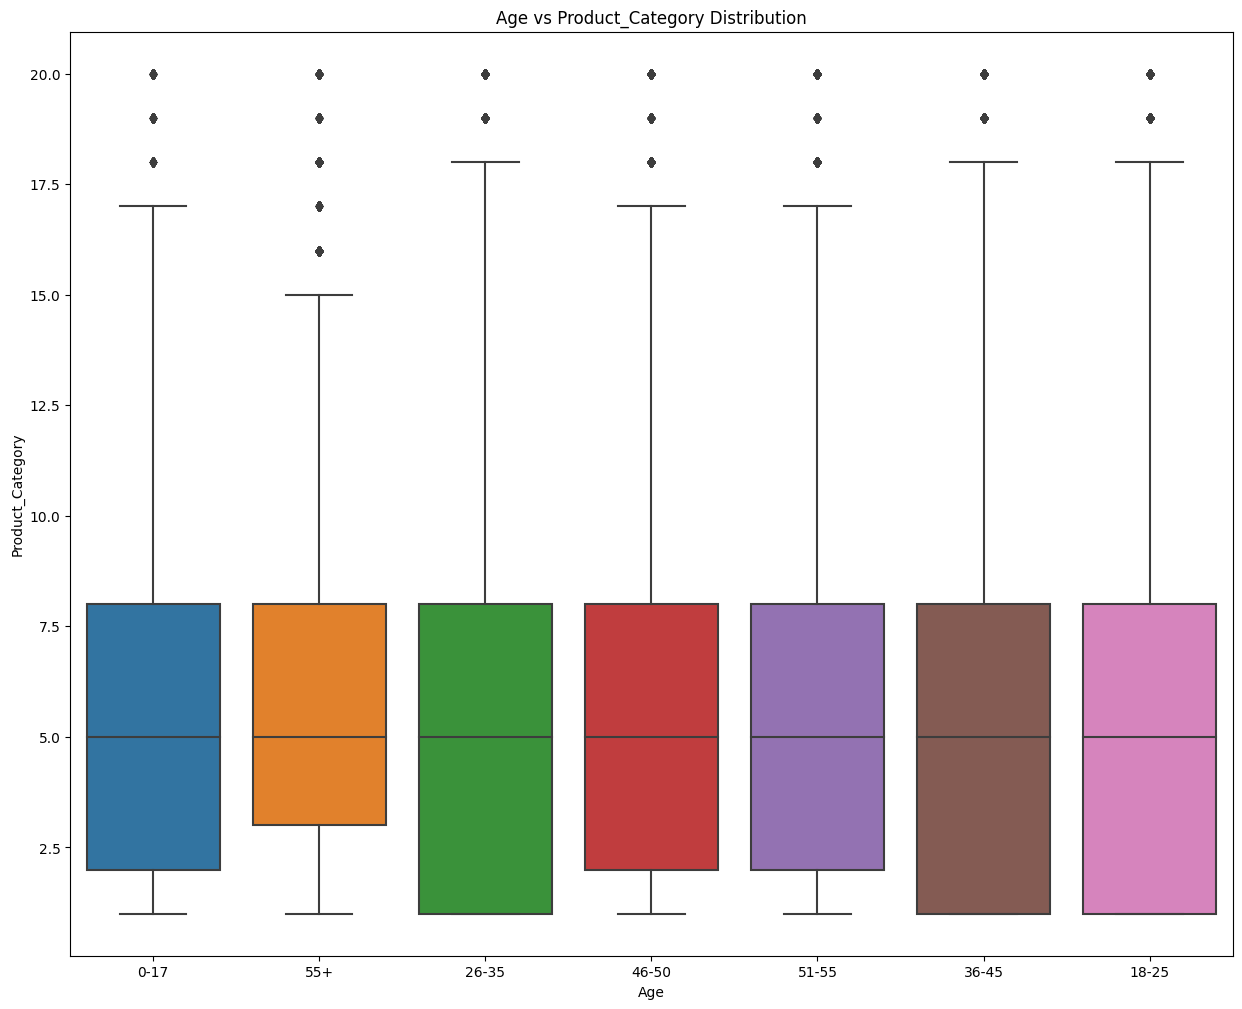

In [ ]:
plt.figure(figsize=(15, 12))
sns.boxplot(data=w,x = 'Age' , y = 'Product_Category')
plt.xlabel('Age')  # Add an x-axis label if needed
plt.ylabel('Product_Category')  # Add a y-axis label if needed
plt.title('Age vs Product_Category Distribution')

Text(0.5, 1.0, 'Age vs Purchase Distribution')

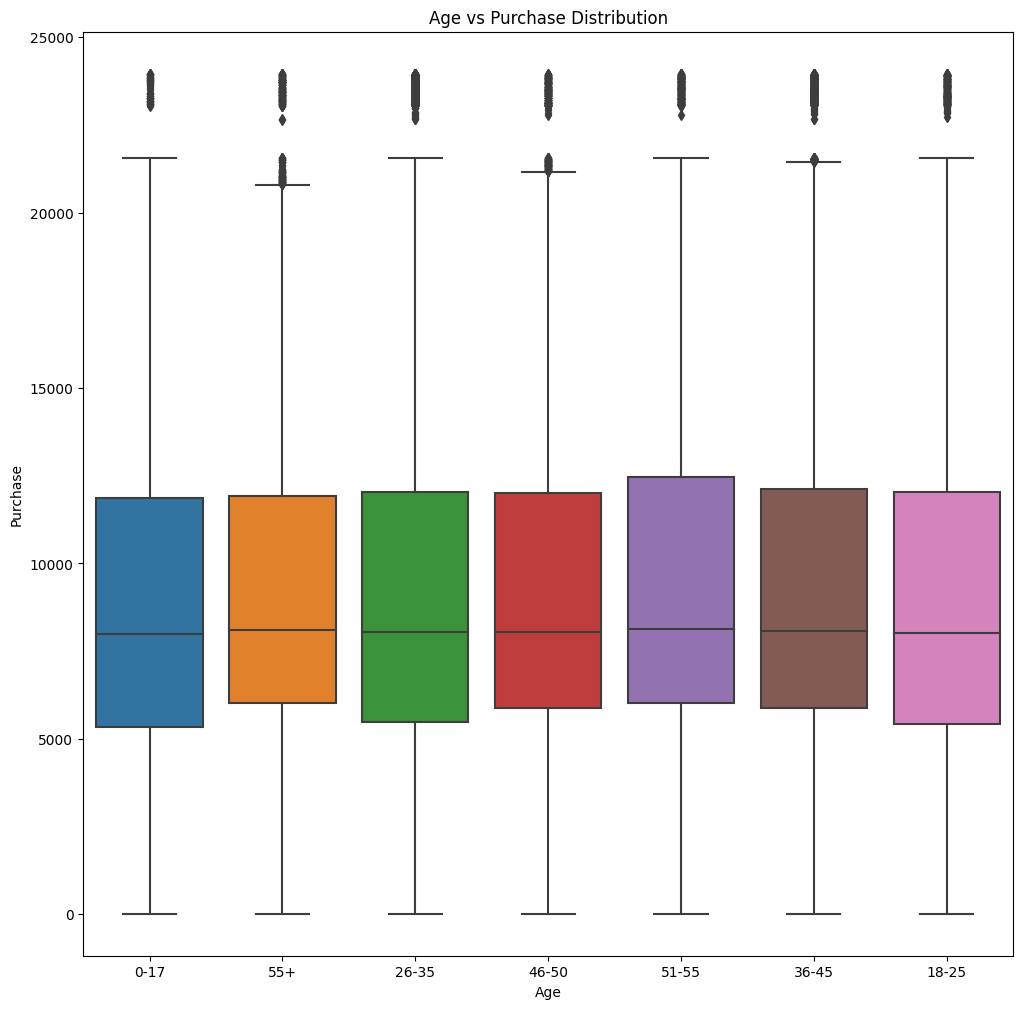

In [ ]:
plt.figure(figsize=(12, 12))
sns.boxplot(data=w,x = 'Age' , y = 'Purchase')
plt.xlabel('Age')  # Add an x-axis label if needed
plt.ylabel('Purchase')  # Add a y-axis label if needed
plt.title('Age vs Purchase Distribution')


In [ ]:
# from the above we could see there are considerable outliers in each categor of the age.
#However the mean and percentile of all the category remains almost the same

Text(0.5, 1.0, 'City_Category vs Occupation Distribution')

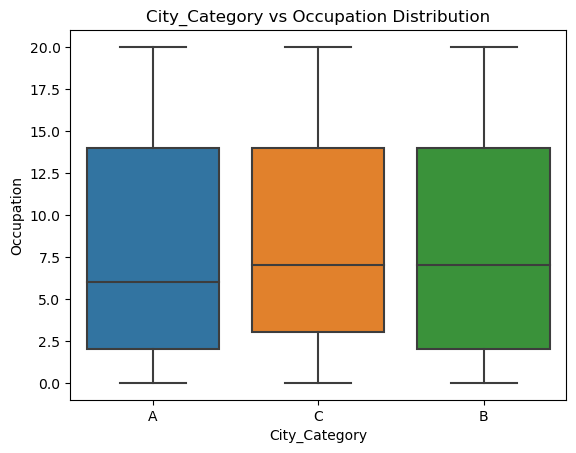

In [ ]:
sns.boxplot(data=w,x = 'City_Category' , y = 'Occupation')
plt.xlabel('City_Category')  # Add an x-axis label if needed
plt.ylabel('Occupation')  # Add a y-axis label if needed
plt.title('City_Category vs Occupation Distribution')

In [ ]:
# We could see that in all the city almost all people working in difference occupation are present

Text(0.5, 1.0, 'City_Category vs Product_Category Distribution')

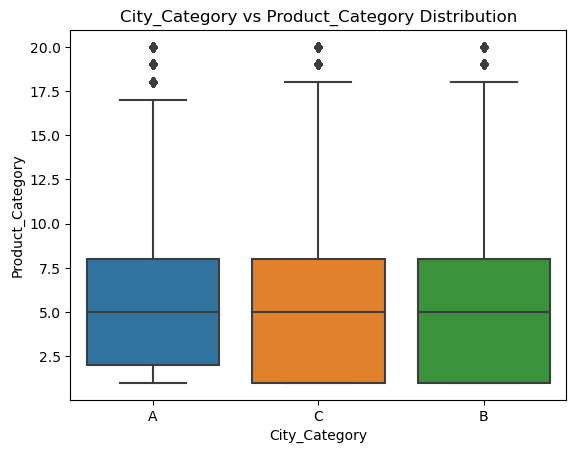

In [ ]:
sns.boxplot(data=w,x = 'City_Category' , y = 'Product_Category')
plt.xlabel('City_Category')  # Add an x-axis label if needed
plt.ylabel('Product_Category')  # Add a y-axis label if needed
plt.title('City_Category vs Product_Category Distribution')


In [ ]:
# Here we could see that in City A the product Category 18, 19 ,20 is an outlier
# City C,B the outliers category are 19 and 20.
# we need to figure out why 19,20 product category is an outlier

Text(0.5, 1.0, 'City_Category vs Product_Category Distribution')

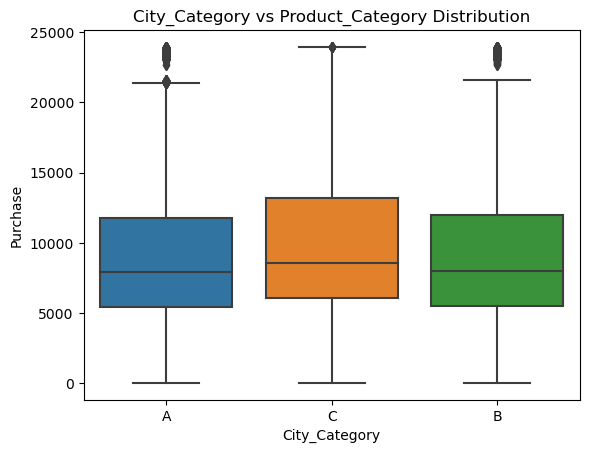

In [ ]:
sns.boxplot(data=w,x = 'City_Category' , y = 'Purchase')
plt.xlabel('City_Category')  # Add an x-axis label if needed
plt.ylabel('Purchase')  # Add a y-axis label if needed
plt.title('City_Category vs Product_Category Distribution')

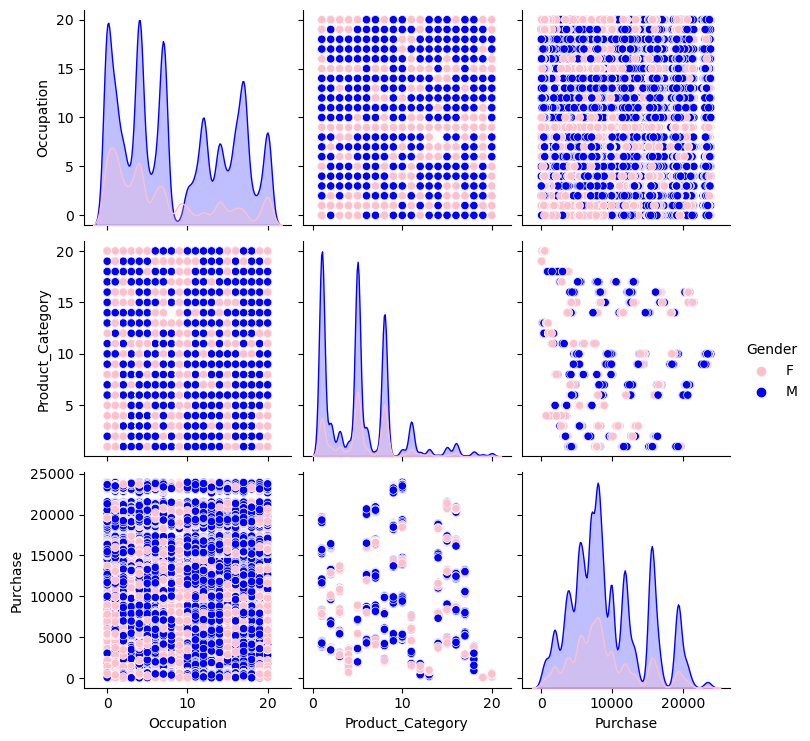

In [ ]:
selected_columns = ['Gender', 'Age', 'Occupation', 'City_Category', 'Marital_Status', 'Product_Category', 'Purchase']

# Subsetting the DataFrame
pair_plot_data = w[selected_columns]

# Creating a pair plot
sns.pairplot(pair_plot_data, hue='Gender', palette={'M': 'blue', 'F': 'pink'})
plt.show()

In [ ]:
# We could see that purchase capcity of City C is very High as there is only one outlier which is very close to the 100 percentile.
# For City A and B there are outliers on the purchases amount between 21000 to 25000

C:\Users\ariva\AppData\Local\Temp\ipykernel_6048\181201426.py:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = correlation_data_encoded.corr()


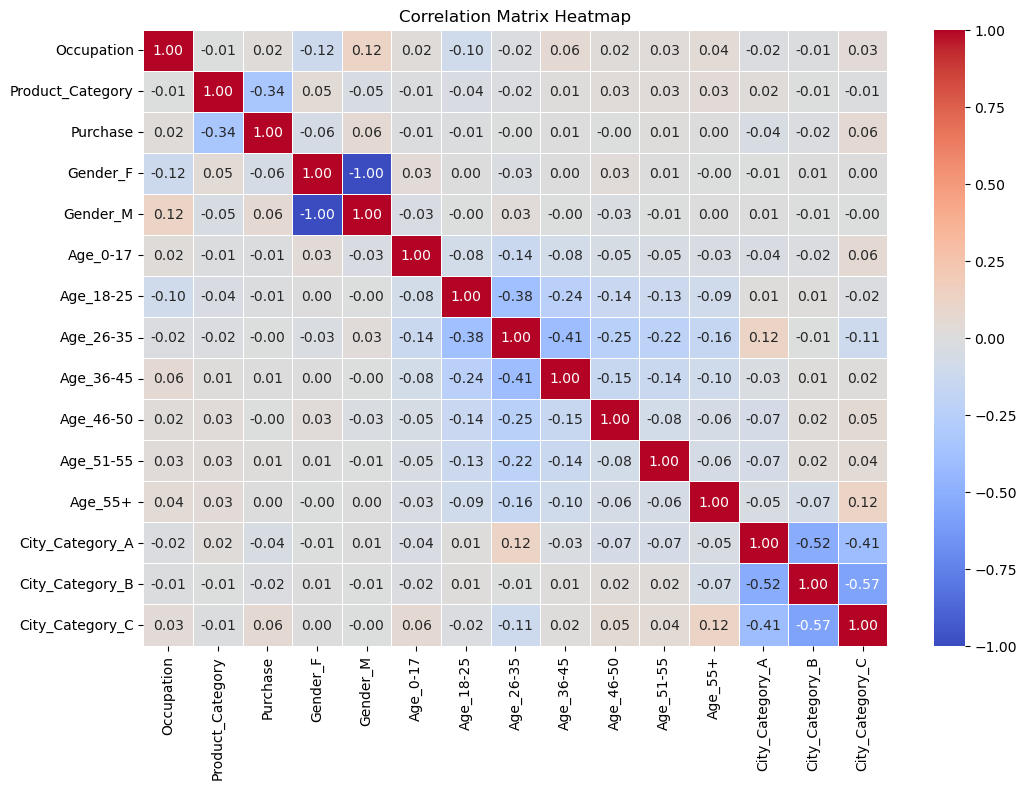

In [ ]:
# Selecting relevant columns for the correlation matrix
selected_columns = ['Gender', 'Age', 'Occupation', 'City_Category', 'Marital_Status', 'Product_Category', 'Purchase']

# Subsetting the DataFrame
correlation_data = w[selected_columns]

# Encoding categorical variables for correlation analysis
correlation_data_encoded = pd.get_dummies(correlation_data, columns=['Gender', 'Age', 'City_Category'])

# Calculating the correlation matrix
correlation_matrix = correlation_data_encoded.corr()

# Plotting the correlation matrix heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


C:\Users\ariva\AppData\Local\Temp\ipykernel_6048\1468307695.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = correlation_data.corr()


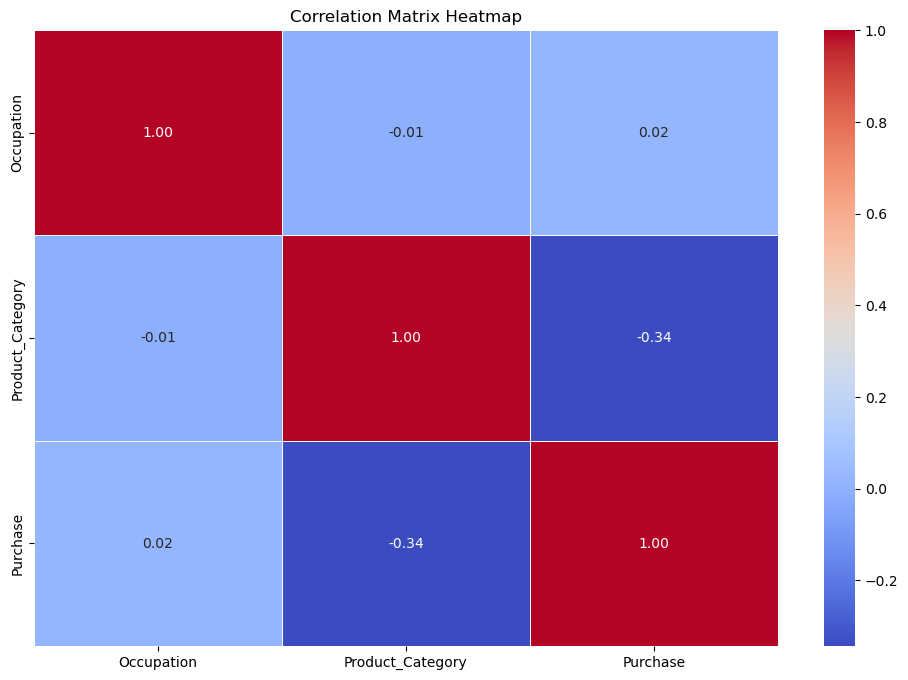

In [ ]:
# Selecting relevant numerical columns for the correlation matrix
numerical_columns = ['Gender', 'Age', 'Occupation', 'City_Category', 'Marital_Status', 'Product_Category', 'Purchase']

# Subsetting the DataFrame
correlation_data = w[numerical_columns]

# Calculating the correlation matrix
correlation_matrix = correlation_data.corr()

# Plotting the correlation matrix heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()



In [ ]:
ag_cat = w['Age'].unique()
ag_cat

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [ ]:
sample_size = 10000

# Sample of female and male customers
female_expenses_sample = w[w['Gender'] == 'F']['Purchase'].sample(sample_size, random_state=42)
male_expenses_sample = w[w['Gender'] == 'M']['Purchase'].sample(sample_size, random_state=42)

# Calculate average expenses
avg_female_expenses = female_expenses_sample.mean()
avg_male_expenses = male_expenses_sample.mean()

print(f"Average expenses for female customers: {avg_female_expenses}")
print(f"Average expenses for male customers: {avg_male_expenses}")

# Calculate the confidence interval for female expenses
def confidence_interval(expenses, confidence_level):
    sample_size = len(expenses)
    std_dev = expenses.std()
    margin_of_error = t.ppf((1 + confidence_level) / 2, sample_size - 1) * (std_dev / np.sqrt(sample_size))
    ci_lower = expenses.mean() - margin_of_error
    ci_upper = expenses.mean() + margin_of_error
    return ci_lower, ci_upper

# Confidence intervals for female and male expenses
confidence_level = 0.95

# Update the sample size based on the counts
sample_size_female = min(sample_size, len(female_expenses_sample))
sample_size_male = min(sample_size, len(male_expenses_sample))

ci_lower_female, ci_upper_female = confidence_interval(female_expenses_sample, confidence_level)
ci_lower_male, ci_upper_male = confidence_interval(male_expenses_sample, confidence_level)

print(f"{confidence_level * 100}% Confidence Interval for female expenses: ({ci_lower_female}, {ci_upper_female})")
print(f"{confidence_level * 100}% Confidence Interval for male expenses: ({ci_lower_male}, {ci_upper_male})")


Average expenses for female customers: 8749.4268
Average expenses for male customers: 9509.5545
95.0% Confidence Interval for female expenses: (8655.31692752263, 8843.536672477368)
95.0% Confidence Interval for male expenses: (9409.406969731755, 9609.702030268245)


C:\Users\ariva\AppData\Local\Temp\ipykernel_18232\2512309777.py:32: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(female_expenses_sample, shade=True, color='skyblue', label='Female Expenses KDE')
C:\Users\ariva\AppData\Local\Temp\ipykernel_18232\2512309777.py:33: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(male_expenses_sample, shade=True, color='orange', label='Male Expenses KDE')


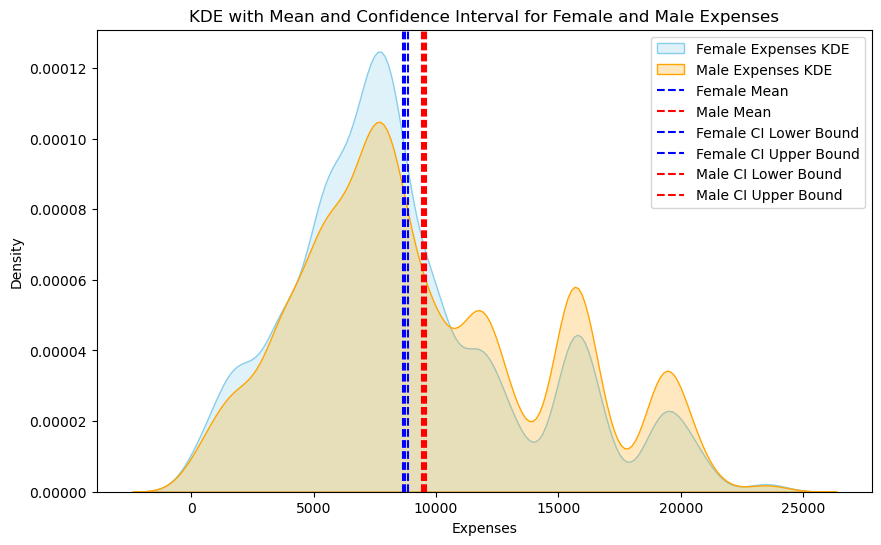

In [ ]:

sample_size = 10000

# Sample of female and male customers
female_expenses_sample = w[w['Gender'] == 'F']['Purchase'].sample(sample_size, random_state=42)
male_expenses_sample = w[w['Gender'] == 'M']['Purchase'].sample(sample_size, random_state=42)

# Calculate average expenses
avg_female_expenses = female_expenses_sample.mean()
avg_male_expenses = male_expenses_sample.mean()

# Calculate the confidence interval for female expenses
def confidence_interval(expenses, confidence_level):
    sample_size = len(expenses)
    std_dev = expenses.std()
    margin_of_error = stats.t.ppf((1 + confidence_level) / 2, sample_size - 1) * (std_dev / np.sqrt(sample_size))
    ci_lower = expenses.mean() - margin_of_error
    ci_upper = expenses.mean() + margin_of_error
    return ci_lower, ci_upper

# Confidence intervals for female and male expenses
confidence_level = 0.95  # You can adjust this

# Update the sample size based on the counts
sample_size_female = min(sample_size, len(female_expenses_sample))
sample_size_male = min(sample_size, len(male_expenses_sample))

ci_lower_female, ci_upper_female = confidence_interval(female_expenses_sample, confidence_level)
ci_lower_male, ci_upper_male = confidence_interval(male_expenses_sample, confidence_level)

# Plotting KDE with mean and confidence interval
plt.figure(figsize=(10, 6))
sns.kdeplot(female_expenses_sample, shade=True, color='skyblue', label='Female Expenses KDE')
sns.kdeplot(male_expenses_sample, shade=True, color='orange', label='Male Expenses KDE')

plt.axvline(x=avg_female_expenses, color='blue', linestyle='--', label='Female Mean')
plt.axvline(x=avg_male_expenses, color='red', linestyle='--', label='Male Mean')

plt.axvline(x=ci_lower_female, color='blue', linestyle='--', label='Female CI Lower Bound')
plt.axvline(x=ci_upper_female, color='blue', linestyle='--', label='Female CI Upper Bound')

plt.axvline(x=ci_lower_male, color='red', linestyle='--', label='Male CI Lower Bound')
plt.axvline(x=ci_upper_male, color='red', linestyle='--', label='Male CI Upper Bound')

plt.title('KDE with Mean and Confidence Interval for Female and Male Expenses')
plt.xlabel('Expenses')
plt.legend()
plt.show()


In [ ]:
# Tracking amount spent per transaction for male and female customers
female_expenses = w[w['Gender'] == 'F']['Purchase']
male_expenses = w[w['Gender'] == 'M']['Purchase']

# Calculate average expenses
avg_female_expenses = female_expenses.mean()
avg_male_expenses = male_expenses.mean()

print(f"Average expenses for female customers: {avg_female_expenses}")
print(f"Average expenses for male customers: {avg_male_expenses}")

# Confidence Interval for female expenses
from scipy.stats import t, norm

# Assuming a 95% confidence level
confidence_level = 0.95
sample_size = len(female_expenses)

# Standard deviation of the sample
std_dev = female_expenses.std()

# Margin of error
margin_of_error = t.ppf((1 + confidence_level) / 2, sample_size - 1) * (std_dev / (sample_size ** 0.5))

# Confidence interval
ci_lower = avg_female_expenses - margin_of_error
ci_upper = avg_female_expenses + margin_of_error

print(f"Confidence Interval for female expenses: ({ci_lower}, {ci_upper})")


Average expenses for female customers: 8734.565765155476
Average expenses for male customers: 9437.526040472265
Confidence Interval for female expenses: (8709.21132117373, 8759.92020913722)


In [ ]:
# here we have calculated the mean for the entire Data set rather than the sample data set
# We could see that the average purchases made by Male is comapratievly higher than that of female

In [ ]:
# Assuming a 95% confidence level
confidence_level = 0.95
sample_size = len(male_expenses)

# Standard deviation of the sample
std_dev = male_expenses.std()

# Margin of error
margin_of_error = t.ppf((1 + confidence_level) / 2, sample_size - 1) * (std_dev / (sample_size ** 0.5))

# Confidence interval
cim_lower = avg_male_expenses - margin_of_error
cim_upper = avg_male_expenses + margin_of_error

print(f"Confidence Interval for male expenses: ({cim_lower}, {cim_upper})")

Confidence Interval for male expenses: (9422.019402055814, 9453.032678888716)


In [ ]:
# Tracking amount spent per transaction for Married and Unmarried customers
Married_expenses = w[w['Marital_Status'] == 'Married']['Purchase']
Unmarried_expenses = w[w['Marital_Status'] == 'UnMarried']['Purchase']

# Calculate average expenses
avg_Married_expenses = Married_expenses.mean()
avg_Unmarried_expenses = Unmarried_expenses.mean()

print(f"Average expenses for Married customers: {avg_Married_expenses}")
print(f"Average expenses for Unmarried customers: {avg_Unmarried_expenses}")

# Assuming a 95% confidence level
confidence_level = 0.95
sample_size = len(Married_expenses)

# Standard deviation of the sample
std_dev = Married_expenses.std()

# Margin of error
margin_of_error = t.ppf((1 + confidence_level) / 2, sample_size - 1) * (std_dev / (sample_size ** 0.5))

# Confidence interval
ci_lower = avg_Married_expenses - margin_of_error
ci_upper = avg_Married_expenses + margin_of_error

print(f"Confidence Interval for Married expenses: ({ci_lower}, {ci_upper})")

Average expenses for Married customers: 9261.174574082374
Average expenses for Unmarried customers: 9265.907618921507
Confidence Interval for Married expenses: (9240.460315792989, 9281.888832371758)


In [ ]:
# Assuming a 95% confidence level
confidence_level = 0.95
sample_size = len(Unmarried_expenses)

# Standard deviation of the sample
std_dev = Unmarried_expenses.std()

# Margin of error
margin_of_error = t.ppf((1 + confidence_level) / 2, sample_size - 1) * (std_dev / (sample_size ** 0.5))

# Confidence interval
cium_lower = avg_Unmarried_expenses - margin_of_error
cium_upper = avg_Unmarried_expenses + margin_of_error

print(f"Confidence Interval for Unmarried expenses: ({cium_lower}, {cium_upper})")

Confidence Interval for Unmarried expenses: (9248.616353737028, 9283.198884105985)


In [ ]:
def confidenceInterval(confidence_level, expenses, avg1):
    sample_size = len(expenses)

    # Standard deviation of the sample
    std_dev = expenses.std()

    # Margin of error
    margin_of_error = t.ppf((1 + confidence_level / 100) / 2, sample_size - 1) * (std_dev / (sample_size ** 0.5))

    # Confidence Interval
    ci_lower = avg1 - margin_of_error
    ci_upper = avg1 + margin_of_error

    return ci_lower, ci_upper

# Tracking amount spent per transaction for Married and Unmarried customers
Married_expenses = w[w['Marital_Status'] == 'Married']['Purchase']
Unmarried_expenses = w[w['Marital_Status'] == 'UnMarried']['Purchase']

# Calculate average expenses
avg_Married_expenses = Married_expenses.mean()
avg_Unmarried_expenses = Unmarried_expenses.mean()

print(f"Average expenses for Married customers: {avg_Married_expenses}")
print(f"Average expenses for Unmarried customers: {avg_Unmarried_expenses}")

ci_low_Married_90, ci_upper_Married_90 = confidenceInterval(confidence_level=90, expenses=Married_expenses, avg1=avg_Married_expenses)
print(f"90 percent Confidence Interval for Married expenses: ({ci_low_Married_90}, {ci_upper_Married_90})")

ci_low_Unmarried_90, ci_upper_Unmarried_90 = confidenceInterval(confidence_level=90, expenses=Unmarried_expenses, avg1=avg_Unmarried_expenses)
print(f"90 percent Confidence Interval for Unmarried expenses: ({ci_low_Unmarried_90}, {ci_upper_Unmarried_90})")

ci_low_Married_95, ci_upper_Married_95 = confidenceInterval(confidence_level=95, expenses=Married_expenses, avg1=avg_Married_expenses)
print(f"95 percent Confidence Interval for Married expenses: ({ci_low_Married_95}, {ci_upper_Married_95})")

ci_low_Unmarried_95, ci_upper_Unmarried_95 = confidenceInterval(confidence_level=95, expenses=Unmarried_expenses, avg1=avg_Unmarried_expenses)
print(f"95 percent Confidence Interval for Unmarried expenses: ({ci_low_Unmarried_95}, {ci_upper_Unmarried_95})")

ci_low_Married_99, ci_upper_Married_99 = confidenceInterval(confidence_level=99, expenses=Married_expenses, avg1=avg_Married_expenses)
print(f"99 percent Confidence Interval for Married expenses: ({ci_low_Married_99}, {ci_upper_Married_99})")

ci_low_Unmarried_99, ci_upper_Unmarried_99 = confidenceInterval(confidence_level=99, expenses=Unmarried_expenses, avg1=avg_Unmarried_expenses)
print(f"99 percent Confidence Interval for Unmarried expenses: ({ci_low_Unmarried_99}, {ci_upper_Unmarried_99})")


Average expenses for Married customers: 9261.174574082374
Average expenses for Unmarried customers: 9265.907618921507
90 percent Confidence Interval for Married expenses: (9243.79064243542, 9278.558505729326)
90 percent Confidence Interval for Unmarried expenses: (9251.396344426079, 9280.418893416934)
95 percent Confidence Interval for Married expenses: (9240.460315792989, 9281.888832371758)
95 percent Confidence Interval for Unmarried expenses: (9248.616353737028, 9283.198884105985)
99 percent Confidence Interval for Married expenses: (9233.951339733765, 9288.397808430982)
99 percent Confidence Interval for Unmarried expenses: (9243.182995563593, 9288.63224227942)


In [ ]:
# Tracking amount spent per transaction for male and female customers
female_expenses = w[w['Gender'] == 'F']['Purchase']
male_expenses = w[w['Gender'] == 'M']['Purchase']

# Calculate average expenses
avg_female_expenses = female_expenses.mean()
avg_male_expenses = male_expenses.mean()

print(f"Average expenses for female customers: {avg_female_expenses}")
print(f"Average expenses for male customers: {avg_male_expenses}")



ci_low_male_90, ci_upper_male_90 = confidenceInterval(confidence_level=90, expenses=male_expenses, avg1=avg_male_expenses)
print(f"90 percent Confidence Interval for Male expenses: ({ci_low_male_90}, {ci_upper_male_90})")

ci_low_male_95, ci_upper_male_95 = confidenceInterval(confidence_level=95, expenses=male_expenses, avg1=avg_male_expenses)
print(f"95 percent Confidence Interval for Male expenses: ({ci_low_male_95}, {ci_upper_male_95})")

ci_low_male_99, ci_upper_male_99 = confidenceInterval(confidence_level=99, expenses=male_expenses, avg1=avg_male_expenses)
print(f"99 percent Confidence Interval for Male expenses: ({ci_low_male_99}, {ci_upper_male_99})")

ci_low_female_90, ci_upper_female_90 = confidenceInterval(confidence_level=90, expenses=female_expenses, avg1=avg_female_expenses)
print(f"90 percent Confidence Interval for Female expenses: ({ci_low_female_90}, {ci_upper_female_90})")

ci_low_female_95, ci_upper_female_95 = confidenceInterval(confidence_level=95, expenses=female_expenses, avg1=avg_female_expenses)
print(f"95 percent Confidence Interval for Female expenses: ({ci_low_female_95}, {ci_upper_female_95})")

ci_low_female_99, ci_upper_female_99 = confidenceInterval(confidence_level=99, expenses=female_expenses, avg1=avg_female_expenses)
print(f"99 percent Confidence Interval for Female expenses: ({ci_low_female_99}, {ci_upper_female_99})")

Average expenses for female customers: 8734.565765155476
Average expenses for male customers: 9437.526040472265
90 percent Confidence Interval for Male expenses: (9424.512468203842, 9450.539612740688)
95 percent Confidence Interval for Male expenses: (9422.019402055814, 9453.032678888716)
99 percent Confidence Interval for Male expenses: (9417.14682877079, 9457.90525217374)
90 percent Confidence Interval for Female expenses: (8713.287689504074, 8755.843840806878)
95 percent Confidence Interval for Female expenses: (8709.21132117373, 8759.92020913722)
99 percent Confidence Interval for Female expenses: (8701.24420611832, 8767.887324192632)


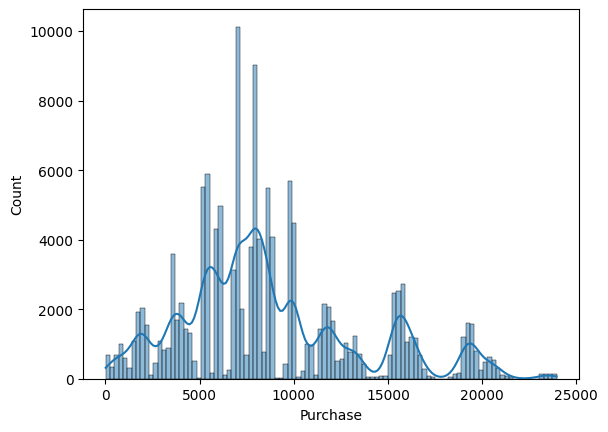

In [ ]:
sns.histplot(x = female_expenses, kde = 'True' )
plt.show()

In [ ]:
def confidenceInterval(confidence_level, expenses, avg1):
    sample_size = len(expenses)

    # Check if the sample size is zero or very small
    if sample_size <= 1:
        return None, None

    # Standard deviation of the sample
    std_dev = expenses.std()

    # Margin of error
    margin_of_error = t.ppf((1 + confidence_level / 100) / 2, sample_size - 1) * (std_dev / (sample_size ** 0.5))

    # Confidence Interval
    ci_lower = avg1 - margin_of_error
    ci_upper = avg1 + margin_of_error

    return ci_lower, ci_upper

# Tracking amount spent per transaction for different age groups
age_bins = ['0-17','18-25','26-35','36-45','46-50','51-55','55+' ]

for age_group in age_bins:
    age_expenses = w[w['Age'] == age_group]['Purchase']
    avg_age_expenses = age_expenses.mean()

    print(f"\nAverage expenses for {age_group} age group customers: {avg_age_expenses}")

    ci_low_age_90, ci_upper_age_90 = confidenceInterval(confidence_level=90, expenses=age_expenses, avg1=avg_age_expenses)
    if ci_low_age_90 is not None and ci_upper_age_90 is not None:
        print(f"90 percent Confidence Interval for {age_group} age group expenses: ({ci_low_age_90}, {ci_upper_age_90})")
    else:
        print(f"Not enough data for {age_group} age group to calculate confidence intervals.")

    ci_low_age_95, ci_upper_age_95 = confidenceInterval(confidence_level=95, expenses=age_expenses, avg1=avg_age_expenses)
    if ci_low_age_95 is not None and ci_upper_age_95 is not None:
        print(f"95 percent Confidence Interval for {age_group} age group expenses: ({ci_low_age_95}, {ci_upper_age_95})")
    else:
        print(f"Not enough data for {age_group} age group to calculate confidence intervals.")

    ci_low_age_99, ci_upper_age_99 = confidenceInterval(confidence_level=99, expenses=age_expenses, avg1=avg_age_expenses)
    if ci_low_age_99 is not None and ci_upper_age_99 is not None:
        print(f"99 percent Confidence Interval for {age_group} age group expenses: ({ci_low_age_99}, {ci_upper_age_99})")
    else:
        print(f"Not enough data for {age_group} age group to calculate confidence intervals.")



Average expenses for 0-17 age group customers: 8933.464640444974
90 percent Confidence Interval for 0-17 age group expenses: (8865.049497531349, 9001.8797833586)
95 percent Confidence Interval for 0-17 age group expenses: (8851.941436361221, 9014.987844528727)
99 percent Confidence Interval for 0-17 age group expenses: (8826.320033768494, 9040.609247121454)

Average expenses for 18-25 age group customers: 9169.663606261289
90 percent Confidence Interval for 18-25 age group expenses: (9143.432787777778, 9195.8944247448)
95 percent Confidence Interval for 18-25 age group expenses: (9138.40756914702, 9200.919643375557)
99 percent Confidence Interval for 18-25 age group expenses: (9128.585922624949, 9210.741289897629)

Average expenses for 26-35 age group customers: 9252.690632869888
90 percent Confidence Interval for 26-35 age group expenses: (9235.102926382391, 9270.278339357385)
95 percent Confidence Interval for 26-35 age group expenses: (9231.733560884022, 9273.647704855754)
99 perce

In [ ]:
# Set the sample size for CLT
sample_size = 10000

# Define confidence levels
confidence_levels = [0.90, 0.95, 0.99]

# Sample of female and male customers
female_expenses_sample = w[w['Gender'] == 'F']['Purchase'].sample(sample_size, random_state=42)
male_expenses_sample = w[w['Gender'] == 'M']['Purchase'].sample(sample_size, random_state=42)

# Calculate average expenses
avg_female_expenses = female_expenses_sample.mean()
avg_male_expenses = male_expenses_sample.mean()

print(f"\nAverage expenses for female customers: {avg_female_expenses}")
print(f"Average expenses for male customers: {avg_male_expenses}")

"""
Central Limit Theorem (CLT) Application:
- The CLT is applied to analyze the distribution of 'Purchase' amounts for female customers.
- A random sample of size 'sample_size' is drawn from the female customer population.
- The mean and standard deviation of the sample are calculated for further analysis.

Impact on Analysis:
- The CLT allows us to make inferences about the population mean based on the sample mean.
- It assumes that the sample size is sufficiently large for the sampling distribution of the mean to be approximately normal.

Assumptions and Implications:
- The assumption of a large enough sample size is critical for the validity of the CLT.
- A larger sample size improves the normality of the sampling distribution, enabling more reliable inferences.
- Results are generalized to the broader population of female customers based on the sample statistics.
"""

# Calculate confidence intervals for female and male expenses
for confidence_level in confidence_levels:
    ci_lower_female, ci_upper_female = confidence_interval(female_expenses_sample, confidence_level)
    ci_lower_male, ci_upper_male = confidence_interval(male_expenses_sample, confidence_level)

    print(f"\n{confidence_level * 100}% Confidence Interval for female expenses: ({ci_lower_female}, {ci_upper_female})")
    print(f"{confidence_level * 100}% Confidence Interval for male expenses: ({ci_lower_male}, {ci_upper_male})")


# Code for Married and Unmarried
married_expenses_sample = w[w['Marital_Status'] == 'Married']['Purchase'].sample(sample_size, random_state=42)
unmarried_expenses_sample = w[w['Marital_Status'] == 'UnMarried']['Purchase'].sample(sample_size, random_state=42)

# Calculate average expenses
avg_married_expenses = married_expenses_sample.mean()
avg_unmarried_expenses = unmarried_expenses_sample.mean()

print(f"\nAverage expenses for married customers: {avg_married_expenses}")
print(f"Average expenses for unmarried customers: {avg_unmarried_expenses}")


"""
Confidence Interval Calculation:
- A confidence interval is computed using the t-distribution based on the sample mean and standard deviation.
- The confidence level is set to {confidence_level * 100}%.
- The margin of error is determined, and the lower and upper bounds of the confidence interval are calculated.

Implications for Generalization:
- The confidence interval provides a range within which we are confident the true population mean lies.
- This interval is used to generalize insights about 'Purchase' amounts for female customers to the entire female customer population.
"""

# Calculate confidence intervals for married and unmarried expenses
for confidence_level in confidence_levels:
    ci_lower_married, ci_upper_married = confidence_interval(married_expenses_sample, confidence_level)
    ci_lower_unmarried, ci_upper_unmarried = confidence_interval(unmarried_expenses_sample, confidence_level)

    print(f"\n{confidence_level * 100}% Confidence Interval for married expenses: ({ci_lower_married}, {ci_upper_married})")
    print(f"{confidence_level * 100}% Confidence Interval for unmarried expenses: ({ci_lower_unmarried}, {ci_upper_unmarried})")


# Code for Age Groups
age_groups = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']

for age_group in age_groups:
    age_expenses_sample = w[w['Age'] == age_group]['Purchase'].sample(sample_size, random_state=42)

    # Calculate average expenses
    avg_age_expenses = age_expenses_sample.mean()

    print(f"\nAverage expenses for customers in age group {age_group}: {avg_age_expenses}")

    # Calculate confidence intervals for age group expenses
    for confidence_level in confidence_levels:
        ci_lower_age, ci_upper_age = confidence_interval(age_expenses_sample, confidence_level)

        print(f"{confidence_level * 100}% Confidence Interval for {age_group} age group expenses: ({ci_lower_age}, {ci_upper_age})")



Average expenses for female customers: 8749.4268
Average expenses for male customers: 9509.5545

90.0% Confidence Interval for female expenses: (8670.449548585813, 8828.404051414185)
90.0% Confidence Interval for male expenses: (9425.510430357817, 9593.598569642183)

95.0% Confidence Interval for female expenses: (8655.31692752263, 8843.536672477368)
95.0% Confidence Interval for male expenses: (9409.406969731755, 9609.702030268245)

99.0% Confidence Interval for female expenses: (8625.736822704559, 8873.11677729544)
99.0% Confidence Interval for male expenses: (9377.929141055301, 9641.179858944699)

Average expenses for married customers: 9274.9659
Average expenses for unmarried customers: 9313.3037

90.0% Confidence Interval for married expenses: (9191.88053434039, 9358.05126565961)
90.0% Confidence Interval for unmarried expenses: (9229.65150562262, 9396.95589437738)

95.0% Confidence Interval for married expenses: (9175.960768434266, 9373.971031565732)
95.0% Confidence Interval fo

Analysis Summary:
Are women spending more money per transaction than men?

No, women are not spending more money per transaction than men.
Average expenses for female customers: $8749.43
Average expenses for male customers: $9509.55
The confidence intervals for both genders suggest that the true average expenses for men are higher than for women.

Confidence intervals and distribution of the mean of the expenses by female and male customers:
For female customers, the 95% confidence interval is approximately ($8655.32, $8843.54).
For male customers, the 95% confidence interval is approximately ($9409.41, $9609.70).
The distribution of mean expenses for both genders shows a clear distinction, with minimal overlap.

Are confidence intervals of average male and female spending overlapping?
No, the confidence intervals for average male and female spending do not overlap.
The distinct intervals indicate a significant difference in average spending between genders.

Results when the same activity is performed for Married vs Unmarried:
Average expenses for married customers: $9274.97
Average expenses for unmarried customers: $9313.30
The confidence intervals for both groups overlap, suggesting a potential similarity in average spending.

Results when the same activity is performed for Age:
There are variations in average spending across different age groups.
Confidence intervals for each age group provide insights into the range of average expenses.
Recommendations and adjustments could be tailored based on the specific needs and behaviors of different age segments.

Recommendations for Walmart:
Targeted Marketing:
Tailor marketing strategies to address the specific spending patterns observed in different demographics.
Focus on promotions and product offerings that align with the preferences of each group.

Inventory Management:
Adjust inventory levels based on the observed spending patterns.
Ensure sufficient stock for products popular among specific groups.

Customer Engagement:
Implement targeted loyalty programs or incentives based on customer demographics.
Enhance customer engagement by addressing the unique needs of each segment.

Store Layout and Experience:
Modify store layouts or online experiences to cater to the preferences of specific demographics.
Create a shopping environment that resonates with the identified customer groups.
By understanding and leveraging these insights, Walmart can optimize its offerings, enhance customer satisfaction, and drive business growth.